<div style="display: flex; align-items: center; justify-content: left; padding: 0px;">
    <div class="logo-container" style="flex:0.13;height:100%;">
        <img src="https://raw.githubusercontent.com/andikaaa18/Tripleten_datascience_project/main/Assets/logo_tripleten.png" alt="Logo" style="max-height: 155px; width: auto; filter:invert(0%);">
    </div>
    <div class="title-container" style="flex:0.85;height:75%;text-align: left">
        <div style="margin: 0px 0px 0px 0px; font-size: 40px; font-family:Trebuchet MS; font-weight:bold; line-height:40px;">Tripleten Indonesia Project</div>
        <div style="margin: 0px 0px 0px 0px; font-size: 30px; font-family:Trebuchet MS;">&mdash; Sprint 12 : Metode Numerik</div>
    </div>
</div>

<hr style="width:95%;height:2px;" align="left">

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:35px; text-align:left; line-height:40px">
Advanced Predictive Modeling and In-Depth Data Analysis for Determining Used Car Market Value
</div>
<div style="font-family:Trebuchet MS; font-weight:regular; font-size:20px; text-align:left; ">
&mdash; Menganalisa pengaruh variasi merek kendaraan, jenis kendaraan, jenis bahan bakar, jenis transmisi dan parameter lainnya terhadap harga mobil bekas.
</div>

# **A. Pendahuluan**

## 1) Deskripsi Proyek

<div style="font-family:Trebuchet MS; font-weight:bold; font-size:25px; padding-bottom:20px">Penambahan fitur prediksi harga pasar kendaraan bekas pada aplikasi jual-beli mobil bekas untuk menarik pembeli baru</div>

<div style="margin-left:2%; width:95%; text-align:justify">

Perusahaan **Rusty Bargain** merupakan perusahaan yang bergerak di bidang jual-beli mobil bekas. Saat ini, perusahaan tersebut sedang mengambangkan aplikasi agar dapat menarik pembeli baru. Salah satu fitur yang ingin dimuat pada aplikasi tersebut adalah fitur yang dapat memberi tahu harga pasar mobil bekas secara akurat dan cepat. Oleh karena itu, perusahaan tersebut meminta kita untuk membuat fitur tersebut menggunakan *machine-learning*. Perusahaan juga memberikan data-data yang dibutuhkan untuk mengembangkan model seperti spesifikasi teknis kendaraan, versi model kendaraan, dan historis harga jual kendaraan.
</div>

## 2) Tujuan dan Alur Proses

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">TUJUAN</div>
<div style="margin-left:2%; width:95%; text-align:justify">

Tujuan yang ingin dicapai pada proyek ini adalah dapat menghasilkan model yang mampu memprediksi harga pasar mobil bekas secara instan dan akurat. Fokus proyek akan ditujukan pada 3 aspek, yaitu:
1. Keakuratan prediksi model.
2. Kecepatan prediksi model.
3. Waktu yang dibutuhkan untuk melatih model.
</div>

<div style="font-family:Trebuchet MS; font-size:25px; padding-bottom:20px; font-weight:bold">ALUR PROYEK</div>
<div style="margin-left:2%; width:95%;text-align:justify">

Adapun proses yang akan dilakukan dalam proses analis untuk proyek ini terdiri dari beberapa langkah utama, yaitu:
1. **Ikhtisar Data.** <div> Pada bagian ini, data yang telah diimpor akan dipahami setiap parameter data serta sejumlah catatan dokumentasi terkait dataset.</div>        
2. **Mempersiapkan Data.** <div> Pada bagian ini, data yang telah diimpor akan dilakukan proses eksplorasi untuk melihat berbagai permasalahan pada data kemudian dilanjutkan dengan perbaikan data. Apabila diperlukan, reduksi dan pengayaan data akan dilakukan untuk membuang informasi yang tidak relevan dan memperkaya informasi pada dataset. Hasil akhir dari proses ini yaitu dataset yang siap untuk dilakukan proses analisis.</div>        
2. **Analisa Data Eksploratif.** <div> Pada bagian ini, data yang telah dipersiapkan akan dilakukan sejumlah perhitungan statistik deskriptif dan menampilkan sejumlah visualisasi data untuk melihat pola-pola tertentu.</div>
3. **Membangun Model *Machine-learning*.** <div> Pada bagian ini akan dilakukan sejumlah proses, diantaranya: *feature engineering*, *hyperparameter tuning* dan diakhiri dengan *model testing*.
</div>

</div>

# **B. Memuat Data**

* Memuat sejumlah *library* dan data yang dibutuhkan.

In [1]:
# import library untuk mengolah data
import pandas as pd, numpy as np

# import library untuk data viz
import matplotlib.pyplot as plt, seaborn as sns
import matplotlib.patheffects as pe
from matplotlib.ticker import FixedLocator

# import library untuk machine learning
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline

# import library untuk model evaluation dan feature engineering
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split

# import library untuk manage warning report
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import library untuk utility
import time
import re
import ast
import joblib
import json

In [2]:
# setting grafik untuk visualisasi data
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.figure_format = 'retina'
plt.style.use('seaborn-v0_8')

In [3]:
# memuat dataset
try:
    raw_df = pd.read_csv("../datasets/car_data.csv", parse_dates=['DateCreated', 'LastSeen'], dayfirst=True).drop(
        columns=['DateCrawled', 'RegistrationMonth', 'PostalCode']
        )
    
except:
    raw_df = pd.read_csv("/datasets/car_data.csv", parse_dates=['DateCreated', 'LastSeen'], dayfirst=True).drop(
        columns=['DateCrawled', 'RegistrationMonth', 'PostalCode']
        )

# **C. Ikhtisar Data**

Berikut di bawah ini ditampilkan 10 baris data pada dataset yang akan dianalisis.

In [4]:
# menampilkan dataset
print(f"Ukuran dataset : {raw_df.shape}")
raw_df.sample(10, random_state=101010)

Ukuran dataset : (354369, 13)


Price  VehicleType  RegistrationYear Gearbox  Power     Model  \
242386    550        wagon              1997    auto    114    laguna   
77507    6900        small              1973     NaN      0    kaefer   
234209   2345  convertible              1986  manual    102       3er   
156855   3000          bus              2001    auto      0      vito   
17201    2999        small              2003    auto     41     other   
329568   3900        sedan              1999  manual    241     other   
341249    300  convertible              1991  manual      0      golf   
237852    100        sedan              1991  manual     90    passat   
143753   6900        sedan              1979     NaN      0       7er   
282476  16999          suv              2015  manual    135  sportage   

        Mileage  FuelType          Brand NotRepaired DateCreated  \
242386   125000    petrol        renault          no  2016-03-14   
77507     40000       NaN     volkswagen          no  2016-04-02   
234209   150000    petrol            bmw          no  2016-03-26   
156855   150000  gasoline  mercedes_benz          no  2016-03-27   
17201     60000  gasoline          smart          no  2016-03-13   
329568   150000    petrol  mercedes_benz          no  2016-03-29   
341249    70000    petrol     volkswagen         yes  2016-03-25   
237852   150000    petrol     volkswagen         yes  2016-03-21   
143753   150000    petrol            bmw         NaN  2016-04-05   
282476    40000    petrol            kia          no  2016-03-20   

        NumberOfPictures            LastSeen  
242386                 0 2016-04-05 18:45:00  
77507                  0 2016-04-06 18:17:00  
234209                 0 2016-03-28 09:45:00  
156855                 0 2016-04-05 22:17:00  
17201                  0 2016-03-14 08:44:00  
329568                 0 2016-04-06 12:15:00  
341249                 0 2016-03-28 10:17:00  
237852                 0 2016-03-21 10:45:00  
143753                 0 2016-04-05 12:40:00  
282476                 0 2016-03-20 09:48:00

Berikut di bawah ini merupakan deskripsi dari masing-masing kolom berdasarkan dokumentasi pada dataset.

***Features***
* `VehicleType` — Jenis bodi kendaraan.
* `RegistrationYear` — Tahun registrasi kendaraan.
* `Gearbox` — Jenis transmisi.
* `Power` — Daya kendaraan (hp).
* `Model` — Model kendaraan.
* `Mileage` — Jarak tempuh mobil (Km).
* `FuelType` — Jenis bahan bakar.
* `Brand` — Merek kendaraan.
* `NotRepaired` — Status apakah kerusakan pada kendaraan belum direparasi (`yes`: Belum direparasi; `no`: Sudah direparasi).
* `DateCreated` — Tanggal profil kendaraan diunggah ke situs web.
* `NumberOfPictures` — Jumlah gambar kendaraan yang diunggah ke situs web.
* `LastSeen` — Tanggal aktivitas terakhir pengunggah profil kendaraan.

***Target***
* `Price` — Harga jual mobil bekas yang dipasang oleh pengunggah profil kendaraan pada situs web (Euro).

Pada dataset ini, **terdapat 13 kolom (12 fitur + 1 target) disertai 354369 observasi profil kendaraan**. Dataset ini memiliki data yang sangat banyak dan tergolong **dataset yang besar**. Kolom `'Price'` akan menjadi variabel dependen (*target*) pada proyek ini sedangkan kolom lainnya akan menjadi variabel independen (*features*).

# **D. Mempersiapkan Data**

## 1) Eksplorasi Data

Berikut di bawah ini merupakan informasi umum dataset.

In [5]:
# menampilkan informasi umum dataset
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Price             354369 non-null  int64         
 1   VehicleType       316879 non-null  object        
 2   RegistrationYear  354369 non-null  int64         
 3   Gearbox           334536 non-null  object        
 4   Power             354369 non-null  int64         
 5   Model             334664 non-null  object        
 6   Mileage           354369 non-null  int64         
 7   FuelType          321474 non-null  object        
 8   Brand             354369 non-null  object        
 9   NotRepaired       283215 non-null  object        
 10  DateCreated       354369 non-null  datetime64[ns]
 11  NumberOfPictures  354369 non-null  int64         
 12  LastSeen          354369 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(6)
memory usage: 35.

Dari informasi di atas, diperoleh:
* Tidak terdapat penggunaan tipe data yang salah.
* Fitur `'NotRepaired'` tergolong fitur biner sehingga sebaiknya menggunakan nilai 0 (no) atau 1 (yes).
* Ditemukannya *missing value* pada sejumlah kolom , yaitu `'VehicleType'`, `'Gearbox'`, `'Model'`, `'FuelType'`, dan `'NotRepaired'`

In [6]:
# menampilkan 15 observasi acak
raw_df.sample(15, random_state=101010)

Price  VehicleType  RegistrationYear Gearbox  Power     Model  \
242386    550        wagon              1997    auto    114    laguna   
77507    6900        small              1973     NaN      0    kaefer   
234209   2345  convertible              1986  manual    102       3er   
156855   3000          bus              2001    auto      0      vito   
17201    2999        small              2003    auto     41     other   
329568   3900        sedan              1999  manual    241     other   
341249    300  convertible              1991  manual      0      golf   
237852    100        sedan              1991  manual     90    passat   
143753   6900        sedan              1979     NaN      0       7er   
282476  16999          suv              2015  manual    135  sportage   
312603   1570  convertible              1998  manual    101      golf   
73751    8400  convertible              2008  manual    126  mx_reihe   
89570   18500        small              2015  manual    136    cooper   
142515   1250        wagon              1998  manual    110    passat   
9278     1899        small              2001  manual    102  a_klasse   

        Mileage  FuelType          Brand NotRepaired DateCreated  \
242386   125000    petrol        renault          no  2016-03-14   
77507     40000       NaN     volkswagen          no  2016-04-02   
234209   150000    petrol            bmw          no  2016-03-26   
156855   150000  gasoline  mercedes_benz          no  2016-03-27   
17201     60000  gasoline          smart          no  2016-03-13   
329568   150000    petrol  mercedes_benz          no  2016-03-29   
341249    70000    petrol     volkswagen         yes  2016-03-25   
237852   150000    petrol     volkswagen         yes  2016-03-21   
143753   150000    petrol            bmw         NaN  2016-04-05   
282476    40000    petrol            kia          no  2016-03-20   
312603   150000    petrol     volkswagen          no  2016-03-12   
73751    125000    petrol          mazda          no  2016-03-26   
89570     10000    petrol           mini          no  2016-04-01   
142515   150000  gasoline     volkswagen         NaN  2016-03-09   
9278     150000    petrol  mercedes_benz          no  2016-03-26   

        NumberOfPictures            LastSeen  
242386                 0 2016-04-05 18:45:00  
77507                  0 2016-04-06 18:17:00  
234209                 0 2016-03-28 09:45:00  
156855                 0 2016-04-05 22:17:00  
17201                  0 2016-03-14 08:44:00  
329568                 0 2016-04-06 12:15:00  
341249                 0 2016-03-28 10:17:00  
237852                 0 2016-03-21 10:45:00  
143753                 0 2016-04-05 12:40:00  
282476                 0 2016-03-20 09:48:00  
312603                 0 2016-03-22 01:47:00  
73751                  0 2016-03-28 00:46:00  
89570                  0 2016-04-05 19:46:00  
142515                 0 2016-03-12 04:45:00  
9278                   0 2016-03-27 17:17:00

In [7]:
# persentase data dengan 'Price' bernilai 0
print("Persentase data 'Price' bernilai 0 : {:.2%}".format(
    (raw_df['Price']==0).sum()/raw_df.shape[0]))

Persentase data 'Price' bernilai 0 : 3.04%


In [8]:
# persentase data dengan 'RegistrationYear' bernilai kurang dari 1888
print("Persentase data 'RegistrationYear' kurang dari 1888: {:.2%}".format(
    (raw_df['Price']<1888).sum()/raw_df.shape[0]))

Persentase data 'RegistrationYear' kurang dari 1888: 39.29%


In [9]:
# persentase data dengan 'Power' bernilai 0
print("Persentase data 'Power' bernilai 0 : {:.2%}".format(
    (raw_df['Power']==0).sum()/raw_df.shape[0]))

Persentase data 'Power' bernilai 0 : 11.35%


In [10]:
# persentase data dengan 'NumberOfPictures' bernilai 0
print("Persentase data 'NumberOfPictures' bernilai 0 : {:.2%}".format(
    (raw_df['NumberOfPictures']==0).sum()/raw_df.shape[0]))

Persentase data 'NumberOfPictures' bernilai 0 : 100.00%


Dari informasi di atas, diperoleh:
* Terdapat sebanyak 3.04% mobil dengan harga 0 Euro, yang mana ini jelas merupakan suatu kesalahan. Data-data ini harus dikeluarkan agar tidak menggangu performa model.
* Mobil pertama kali dijual pada tahun 1888 ([The history of car sales](https://whisbi.com/the-history-of-car-sales/)). Terdapat sebanyak 39.29% mobil yang diregistrasikan pada tahun sebelumnya, yang mana ini jelas adalah kesalahan data. Oleh karena itu, data-data mobil tersebut harus dikeluarkan agar tidak mengganggu performa model.
* Ditemukan sebesar 11.35% data dimana kendaraan memiliki `'Power'` bernilai 0 hp. Jelas ada yang salah dengan nilai tersebut sehingga kita akan mengeluarkan data-data itu agar tidak mengganggu performa model.
* Data pada kolom `'NumberOfPictures'` memiliki nilai 0 seluruhnya, sehingga kolom ini akan dibuang dari dataset.

### **Memeriksa Duplikasi**

Setiap observasi bersifat unik karena mewakili satu profil mobil bekas yang akan dijual. Oleh karena itu, **apabila terdapat suatu observasi yang identik dengan observasi lainnya maka akan dianggap sebagai duplikat dan harus dikeluarkan dari dataset**. Berikut akan dilakukan kalkulasi jumlah observasi yang merupakan duplikat pada dataset.

In [11]:
# menghitung observasi duplikat
print("Terdapat sebanyak {}({:.2%}) observasi duplikat pada dataset".format(
    raw_df.duplicated().sum(), (raw_df.duplicated().sum()/raw_df.shape[0])
))

Terdapat sebanyak 1184(0.33%) observasi duplikat pada dataset


### **Memeriksa Missing Value**

Berikut di bawah ini, akan ditampilkan persentase data yang hilang pada masing-masing kolom.

In [12]:
# menampilkan persentase data yang hilang pada setiap kolom
((raw_df.isna().sum(axis=0).sort_values(ascending=False)/raw_df.shape[0])*100)

NotRepaired         20.079070
VehicleType         10.579368
FuelType             9.282697
Gearbox              5.596709
Model                5.560588
Price                0.000000
RegistrationYear     0.000000
Power                0.000000
Mileage              0.000000
Brand                0.000000
DateCreated          0.000000
NumberOfPictures     0.000000
LastSeen             0.000000
dtype: float64

Berikut di bawah ini, akan ditampilkan persentase observasi yang memiliki *missing value*.

In [13]:
# menampilkan persentase observasi dengan missing value
print("Persentase obsevasi dengan missing values : {:.2%}".format(
    raw_df.isna().any(axis=1).sum()/raw_df.shape[0]
))

Persentase obsevasi dengan missing values : 30.63%


Dari informasi di atas, diperoleh:
* *Missing value* ditemukan pada kolom `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'`.
* Mayoritas *missing value* pada observasi disebabkan oleh data pada kolom `'NotRepaired'`, `'VehicleType'` dan `'FuelType'` yaitu sebesar 20.1%, 10.6% dan 9.3% secara berturut-turut.
* Menghapus observasi yang memiliki *missing value* akan menghilangkan cukup banyak data, yaitu sebesar 30.6% data.

Umumnya pemilik kendaraan mengetahui persis informasi terkait kolom `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'`, karena informasi spesifikasi kendaraan secara rinci tertera pada surat-surat kendaraan. Oleh karena itu, data dengan *missing values* pada kolom tersebut harus dikeluarkan dari dataset.

## 2) Memperbaiki Data

### **Menangani Data Duplikat**

Berdasarkan eksplorasi yang telah dilakukan, terdapat sebanyak 1184 (0.33%) observasi duplikat pada dataset. Oleh karena itu, data-data duplikat tersebut akan dikeluarkan dari dataset.

In [14]:
# menangani duplikat
cln_df = raw_df.drop_duplicates().reset_index(drop=True)

# cek
print(f"jumlah duplikat pada dataset EDA : {cln_df.duplicated().sum()}")

jumlah duplikat pada dataset EDA : 0


### **Menangani *Missing Value***

Berdasarkan eksplorasi yang telah dilakukan, diputuskan bahwa *missing values* pada kolom `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'` akan dibuang dari dataset. Alasan dari keputusan ini adalah seharusnya data tersebut diketahui oleh pemilik profil, sehingga keberadaan *missing values* dapat disebabkan kesalahan sistem input atau kesalahan dalam penarikan data.

In [15]:
# membuang missing values pada kolom `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'`
cln_df = cln_df.dropna(subset=['NotRepaired', 'VehicleType', 'FuelType', 'Gearbox', 'Model'])

print("Persentase obsevasi dengan missing values : {:.2%}".format(cln_df.isna().any(axis=1).sum()/cln_df.shape[0]))

Persentase obsevasi dengan missing values : 0.00%


Pada proses eksplorasi ditemukan sejumlah kolom dengan nilai yang tidak wajar, yaitu kolom `'Price'`, `'RegistrationYear'`, `'Power'`, dan `'NumberOfPictures'`. Terdapat data kendaraan dengan harga 0 Euro, kendaraan yang diregistrasikan sebelum tahun 1888, kendaraan dengan tenaga 0 hp, dan kolom jumlah gambar kendaraan yang seluruhnya bernilai 0. Oleh karena itu, seluruh data tidak wajar pada kolom `'Price'`, `'RegistrationYear'`, dan `'Power'` akan dikeluarkan dari dataset. Adapun kolom `'NumberOfPictures'` juga akan dibuang karena tidak memberikan informasi yang berguna pada proyek ini.

In [16]:
cln_df = cln_df.query("(Price>0)&(RegistrationYear>=1888)&(Power>0)").drop(columns=['NumberOfPictures'])

print("Persentase data 'Price' bernilai 0 : {:.2%}".format((cln_df['Price']==0).sum()/cln_df.shape[0]))
print("Persentase data 'RegistrationYear' kurang dari 1888: {:.2%}".format((cln_df['Price']<1888).sum()/cln_df.shape[0]))
print("Persentase data 'Power' bernilai 0 : {:.2%}".format((cln_df['Power']==0).sum()/cln_df.shape[0]))

Persentase data 'Price' bernilai 0 : 0.00%
Persentase data 'RegistrationYear' kurang dari 1888: 29.51%
Persentase data 'Power' bernilai 0 : 0.00%


### **Memperbaiki Tipe Data**

Berikut kita akan mengganti nilai `'yes'` dan `'no'` pada kolom `NotRepaired'` menjadi `1` dan `0` secara berturut-turut.

In [17]:
# memperbaiki tipe data
cln_df['NotRepaired'] = cln_df['NotRepaired'].map({'yes':1, 'no':0})

# check
cln_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 232177 entries, 3 to 353183
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Price             232177 non-null  int64         
 1   VehicleType       232177 non-null  object        
 2   RegistrationYear  232177 non-null  int64         
 3   Gearbox           232177 non-null  object        
 4   Power             232177 non-null  int64         
 5   Model             232177 non-null  object        
 6   Mileage           232177 non-null  int64         
 7   FuelType          232177 non-null  object        
 8   Brand             232177 non-null  object        
 9   NotRepaired       232177 non-null  int64         
 10  DateCreated       232177 non-null  datetime64[ns]
 11  LastSeen          232177 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 23.0+ MB


## 3) Pengayaan dan Reduksi Data

### **Pengayaan Data**

Pada tahap ini, kita akan menambahkan fitur baru pada data, yaitu **usia kendaraan hingga profil dibuat (dalam tahun)** dan **usia profil unggahan (dalam hari)**. Hal ini perlu dilakukan sebab data waktu, yakni `'RegistrationYear'`, `'DateCreated'`, dan `'LastSeen'` tidak memberikan informasi yang bermanfaat untuk penilaian harga suatu kendaraan. Usia kendaraan dapat menjadi fitur langsung yang dapat mengestimasi harga kendaraan. Adapun usia profil unggahan dapat memberikan informasi seberapa menarik kendaraan bekas yang dijual sehingga membuat penjual sering masuk ke platform untuk membalas pesan calon pembeli.

In [18]:
# pengayaan data
cln_df['car_age'] = cln_df['DateCreated'].dt.year - cln_df['RegistrationYear']
cln_df['post_age'] = (cln_df['LastSeen'] - cln_df['DateCreated']).dt.days

cln_df.head(10)

Price  VehicleType  RegistrationYear Gearbox  Power     Model  Mileage  \
3    1500        small              2001  manual     75      golf   150000   
4    3600        small              2008  manual     69     fabia    90000   
5     650        sedan              1995  manual    102       3er   150000   
6    2200  convertible              2004  manual    109   2_reihe   150000   
10   2000        sedan              2004  manual    105   3_reihe   150000   
11   2799        wagon              2005  manual    140    passat   150000   
14  17999          suv              2011  manual    190    navara    70000   
17   1750        small              2004    auto     75    twingo   150000   
18   7550          bus              2007  manual    136     c_max   150000   
19   1850          bus              2004  manual    102  a_klasse   150000   

    FuelType          Brand  NotRepaired DateCreated            LastSeen  \
3     petrol     volkswagen            0  2016-03-17 2016-03-17 17:40:00   
4   gasoline          skoda            0  2016-03-31 2016-04-06 10:17:00   
5     petrol            bmw            1  2016-04-04 2016-04-06 19:17:00   
6     petrol        peugeot            0  2016-04-01 2016-04-05 18:18:00   
10    petrol          mazda            0  2016-03-26 2016-04-06 10:45:00   
11  gasoline     volkswagen            1  2016-04-07 2016-04-07 10:25:00   
14  gasoline         nissan            0  2016-03-21 2016-04-06 07:45:00   
17    petrol        renault            0  2016-03-20 2016-04-06 13:16:00   
18  gasoline           ford            0  2016-03-23 2016-04-05 18:45:00   
19    petrol  mercedes_benz            0  2016-04-01 2016-04-05 22:46:00   

    car_age  post_age  
3        15         0  
4         8         6  
5        21         2  
6        12         4  
10       12        11  
11       11         0  
14        5        16  
17       12        17  
18        9        13  
19       12         4

### **Reduksi Data**

Pada bagian ini, kita akan membuang fitur-fitur yang tidak diperlukan pada proyek ini. Fitur-fitur yang akan dibuang pada tahap ini, yaitu `'RegistrationYear'`, `'DateCreated'`, dan `'LastSeen'`. Hal ini disebabkan ketiga fitur tersebut telah digunakan untuk membangun informasi pada fitur `'car_age'` dan `'post_age'`.

In [19]:
# reduksi data
cln_df = cln_df.drop(columns=['RegistrationYear', 'DateCreated', 'LastSeen']).reset_index(drop=True)
cln_df.head(10)

Price  VehicleType Gearbox  Power     Model  Mileage  FuelType  \
0   1500        small  manual     75      golf   150000    petrol   
1   3600        small  manual     69     fabia    90000  gasoline   
2    650        sedan  manual    102       3er   150000    petrol   
3   2200  convertible  manual    109   2_reihe   150000    petrol   
4   2000        sedan  manual    105   3_reihe   150000    petrol   
5   2799        wagon  manual    140    passat   150000  gasoline   
6  17999          suv  manual    190    navara    70000  gasoline   
7   1750        small    auto     75    twingo   150000    petrol   
8   7550          bus  manual    136     c_max   150000  gasoline   
9   1850          bus  manual    102  a_klasse   150000    petrol   

           Brand  NotRepaired  car_age  post_age  
0     volkswagen            0       15         0  
1          skoda            0        8         6  
2            bmw            1       21         2  
3        peugeot            0       12         4  
4          mazda            0       12        11  
5     volkswagen            1       11         0  
6         nissan            0        5        16  
7        renault            0       12        17  
8           ford            0        9        13  
9  mercedes_benz            0       12         4

## 4) Kesimpulan

Dataset telah dibersihkan dan ditambahkan informasi tambahan ke dalamnya. Dataset dapat digunakan untuk tahap selanjutnya, yakni analisa data eksploratif dan membangun model. Berikut merupakan sejumlah hal yang dilakukan selama persiapan data.
1. Membuang baris data yang memiliki duplikat.
2. Membuang baris data yang memiliki *missing values* pada kolom `'NotRepaired'`, `'VehicleType'`, `'FuelType'`, `'Gearbox'`, dan `'Model'`.
3. Membuang baris data yang memiliki nilai tidak wajar, seperti harga senilai 0 Euro, power kendaraan senilai 0 hp, dll.
4. Melakukan pengayaan data dengan menambahkan fitur usia kendaraan (`'car_age'`) dan usia unggahan (`'post_age'`).
5. Membuang fitur-fitur yang tidak dibutuhkan.

Berikut di bawah ini merupakan dataset yang siap digunakan untuk tahap selanjutnya.

In [20]:
# menampilkan dataset
print(f"Ukuran dataset : {cln_df.shape}")
cln_df.head(10)

Ukuran dataset : (232177, 11)


Price  VehicleType Gearbox  Power     Model  Mileage  FuelType  \
0   1500        small  manual     75      golf   150000    petrol   
1   3600        small  manual     69     fabia    90000  gasoline   
2    650        sedan  manual    102       3er   150000    petrol   
3   2200  convertible  manual    109   2_reihe   150000    petrol   
4   2000        sedan  manual    105   3_reihe   150000    petrol   
5   2799        wagon  manual    140    passat   150000  gasoline   
6  17999          suv  manual    190    navara    70000  gasoline   
7   1750        small    auto     75    twingo   150000    petrol   
8   7550          bus  manual    136     c_max   150000  gasoline   
9   1850          bus  manual    102  a_klasse   150000    petrol   

           Brand  NotRepaired  car_age  post_age  
0     volkswagen            0       15         0  
1          skoda            0        8         6  
2            bmw            1       21         2  
3        peugeot            0       12         4  
4          mazda            0       12        11  
5     volkswagen            1       11         0  
6         nissan            0        5        16  
7        renault            0       12        17  
8           ford            0        9        13  
9  mercedes_benz            0       12         4

Berikut di bawah ini merupakan deskripsi dari masing-masing kolom untuk dataset setelah *pre-processing*.

***Features***
* `VehicleType` — Jenis bodi kendaraan.
* `Gearbox` — Jenis transmisi.
* `Power` — Daya kendaraan (hp).
* `Model` — Model kendaraan.
* `Mileage` — Jarak tempuh mobil (Km).
* `FuelType` — Jenis bahan bakar.
* `Brand` — Merek kendaraan.
* `NotRepaired` — Status apakah kerusakan pada kendaraan belum direparasi (`1`: Belum direparasi; `0`: Sudah direparasi).
* `car_age` — Usia kendaraan hingga unggahan dibuat (tahun).
* `post_age` — Usia aktif profil unggahan (hari).

***Target***
* `Price` — Harga jual mobil bekas yang dipasang oleh pengunggah profil kendaraan pada situs web (Euro).

In [21]:
# informasi dataset
cln_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232177 entries, 0 to 232176
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Price        232177 non-null  int64 
 1   VehicleType  232177 non-null  object
 2   Gearbox      232177 non-null  object
 3   Power        232177 non-null  int64 
 4   Model        232177 non-null  object
 5   Mileage      232177 non-null  int64 
 6   FuelType     232177 non-null  object
 7   Brand        232177 non-null  object
 8   NotRepaired  232177 non-null  int64 
 9   car_age      232177 non-null  int64 
 10  post_age     232177 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 19.5+ MB


In [22]:
# menyimpan dataset
cln_df.to_csv("../datasets/cleaned_car_data.csv", index=False)

# **E. Analisa Data Eksploratif (EDA)**

Berikut di bawah ini merupakan *function* yang dibutuhkan untuk visualisasi data pada proyek ini.

In [23]:
def line_box_plot(df, x, y, figsize, order_by='mean', ascending_order=True, rot=0, line_label=None, 
                    ylabel=None, xlabel=None, title=None, ylim=None, xlim=None, y_scale:str=None):
    aggre = df.groupby(x)[y].agg(order_by).sort_values(ascending=ascending_order)
    fig, ax1 = plt.subplots(figsize=figsize)
    sns.boxplot(ax=ax1, data=df, x=x, y=y, order=aggre.index, palette='Wistia_r', linewidth=1)
    sns.lineplot(ax=ax1, data=aggre, color='#786700', linewidth=1.5, linestyle='dashed', marker='o',
                 alpha=0.8, label=line_label)
    
    plt.xticks(rotation=rot)
    plt.grid(alpha=0.5, linestyle='dashed', which='both')
    plt.ylabel(ylabel, size=12)
    plt.xlabel(xlabel, size=12)
    plt.title(title, size=15)
    plt.legend(loc='upper right')
    plt.ylim(ylim)
    plt.xlim(xlim)
    if y_scale:
        plt.yscale(y_scale)
    plt.show()

def agg_barplot(df, x, y, figsize, agg='mean', ascending_order=True, rot=0, ylabel=None, xlabel=None, title=None
                , ylim=None, xlim=None, annot=True):
    data_agg = df.groupby(x)[y].agg(agg).sort_values(ascending=ascending_order).reset_index()
    fig,ax1 = plt.subplots(figsize=figsize)
    sns.barplot(ax=ax1, data=data_agg, x=x, y=y, palette='Wistia_r')
    
    if annot:
        for i in ax1.containers:
            x_ = i[0].get_x()
            y_ = i[0].get_height()
            width_ = i[0].get_width()
            ax1.text(x_+width_/2, y_, int(y_), ha='center', va='bottom', c='#BB2525', weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=90)
            
    plt.xticks(rotation=rot)
    plt.ylabel(ylabel, size=12)
    plt.xlabel(xlabel, size=12)
    plt.title(title, size=15)
    plt.ylim(ylim)
    plt.xlim(xlim)
    plt.grid(which='both', alpha=0.5, linestyle='dashed')
    
    plt.show()

def box_hist_plot(df:pd.DataFrame, column:str, size:tuple, width:int, title:str, y_title, xlabel:str, 
                  rot:int=None, l_ylim=None, r_ylim=None, l_xlim=None, r_xlim=None, discrete=False, kde=True):
    
    fig, ax1 = plt.subplots(ncols=2, nrows=1, figsize=size)
    sns.boxplot(ax=ax1[0],data=df, x=column, color='#2A9D8F',
                showmeans=True, meanprops={"marker":"d","markerfacecolor":"white",
                                                    "markeredgecolor":"black","markersize":"6"})
    sns.histplot(ax=ax1[1], data=df, x=column, binwidth=width, kde=kde, color='#2A9D8F', discrete=discrete)
    fig.suptitle(title, size=15, y=y_title)

    # value boxplot
    q1 = df[column].quantile(0.25)
    q2 = df[column].quantile(0.5)
    q3 = df[column].quantile(0.75)
    minimum = df[column].min()
    maximum = df[column].max()
    iqr = q3-q1
    
    if q3+1.5*iqr<=maximum:
        top_whis = q3+1.5*iqr
    else:
        top_whis = maximum
    
    if q1-1.5*iqr>=minimum:
        bottom_whis = q1-1.5*iqr
    else:
        bottom_whis = minimum
    y_position = -0.45

    ax1[0].text(q1, y_position, int(q1), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q2, y_position, int(q2), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(q3, y_position, int(q3), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    ax1[0].text(top_whis, y_position, int(top_whis), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
            path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    if bottom_whis>0:
        ax1[0].text(bottom_whis, y_position, int(bottom_whis), ha='center', va='center', c='#2A9D8F', weight='bold', size=12,
                path_effects=[pe.withStroke(linewidth=2, foreground='white')], rotation=rot)
    else:
        pass

    ax1[0].grid(alpha=0.8, linestyle='dashed')
    ax1[1].grid(alpha=0.8, linestyle='dashed')
    
    ax1[0].set_xlabel(xlabel, size=12)
    ax1[1].set_xlabel(xlabel, size=12)
    
    ax1[0].set_ylim(l_ylim)
    ax1[1].set_ylim(r_ylim)
    ax1[0].set_xlim(l_xlim)
    ax1[1].set_xlim(r_xlim)
    
    plt.show()

## 1) Statistika Deskriptif Pada Data Numerik

Pada dataset, terdapat 2 macam variabel, yaitu variabel numerik dan variabel karegorik. Variabel numerik yang terdapat pada dataset ini, yaitu `'Price'`, `'Power'`, `'Mileage'`, `'car_age'`, dan `'post_age'`. Adapun variabel kategorik pada dataset ini, antara lain: `'VehicleType'`, `'Gearbox'`, `'Model'`, `'FuelType'`, `'Brand'`, dan `'NotRepaired'`. 

Berikut di bawah ini merupakan statistika deskriptif untuk variabel numerik pada dataset.

In [24]:
# deskripsi data untuk variabel numerik
cln_df[['Price', 'Power', 'Mileage', 'car_age', 'post_age']].describe()

Price          Power        Mileage        car_age  \
count  232177.000000  232177.000000  232177.000000  232177.000000   
mean     5290.800820     124.834954  127026.212760      12.912873   
std      4730.111656     137.775074   37080.016066       6.084210   
min         1.000000       1.000000    5000.000000      -2.000000   
25%      1555.000000      82.000000  125000.000000       9.000000   
50%      3666.000000     116.000000  150000.000000      12.000000   
75%      7750.000000     150.000000  150000.000000      17.000000   
max     20000.000000   20000.000000  150000.000000     106.000000   

            post_age  
count  232177.000000  
mean        9.101677  
std         8.671178  
min         0.000000  
25%         2.000000  
50%         6.000000  
75%        14.000000  
max       384.000000

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Terdapat sejumlah nilai abnormal pada data, antara lain:
    * Terdapat kendaraan dengan harga &#x20AC; 1. Tidak wajar kendaraan memiliki harga semurah ini.
    * Terdapat usia kendaraan bernilai negatif.
    * Terdapat kendaraan dengan daya 1 hp. Tidak wajar kendaraan memiliki daya sekecil ini.
    * Terdapat mobil dengan daya hingga 20,000 hp. Daya sebesar ini terlalu besar, bahkan untuk sebuah *super car*.
* Pada data `'Price'`, `'Power'` dan `'post_age'`, nilai standard deviasi memiliki nilai yang sangat besar. Hal ini menunjukkan data sangat tersebar.

</div>

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Nilai abnormal pada data merupakan suatu *outlier* yang harus dibuang** sebelum digunakan untuk melatih model *machine-learning*.
* **Penentuan harga mobil bekas oleh pengguna tentunya bersifat subjektif**, tetapi mobil dengan harga sebesar &#x20AC; 1.00 bukanlah hal yang wajar. Harga suatu mobil tergantung sejumlah aspek, tetapi aspek yang umum adalah merek kendaraan tersebut. Dengan mengasumsikan mobil dalam kondisi terburuk, setidaknya seluruh material dan suku cadangnya masih dapat dihargai di atas 100 Euro.
* Tenaga sebesar 1 hp (746 watt) mungkin wajar untuk suatu alat elektronik rumah berukuran besar. Akan tetapi, daya sebesar itu tidak wajar pada sebuah mobil. Mobil standard umumnya memiliki daya sebesar 100-300 hp tergantung ukuran mobil tersebut.
* Tenaga *supercar* saat ini tidak mungkin memiliki *power* hingga 20,000 hp. **Hingga tahun 2023, belum ada *supercar* yang menembus power di atas 2000 hp**.

</div>



Kita akan melihat data-data numerik tersebut lebih rinci melalui distribusi data setiap variabel. Distribusi tersebut akan ditampilkan dalam format *boxplot* dan histogram. Data yang ditampilkan merupakan data yang difilter dari data-data abnormal.

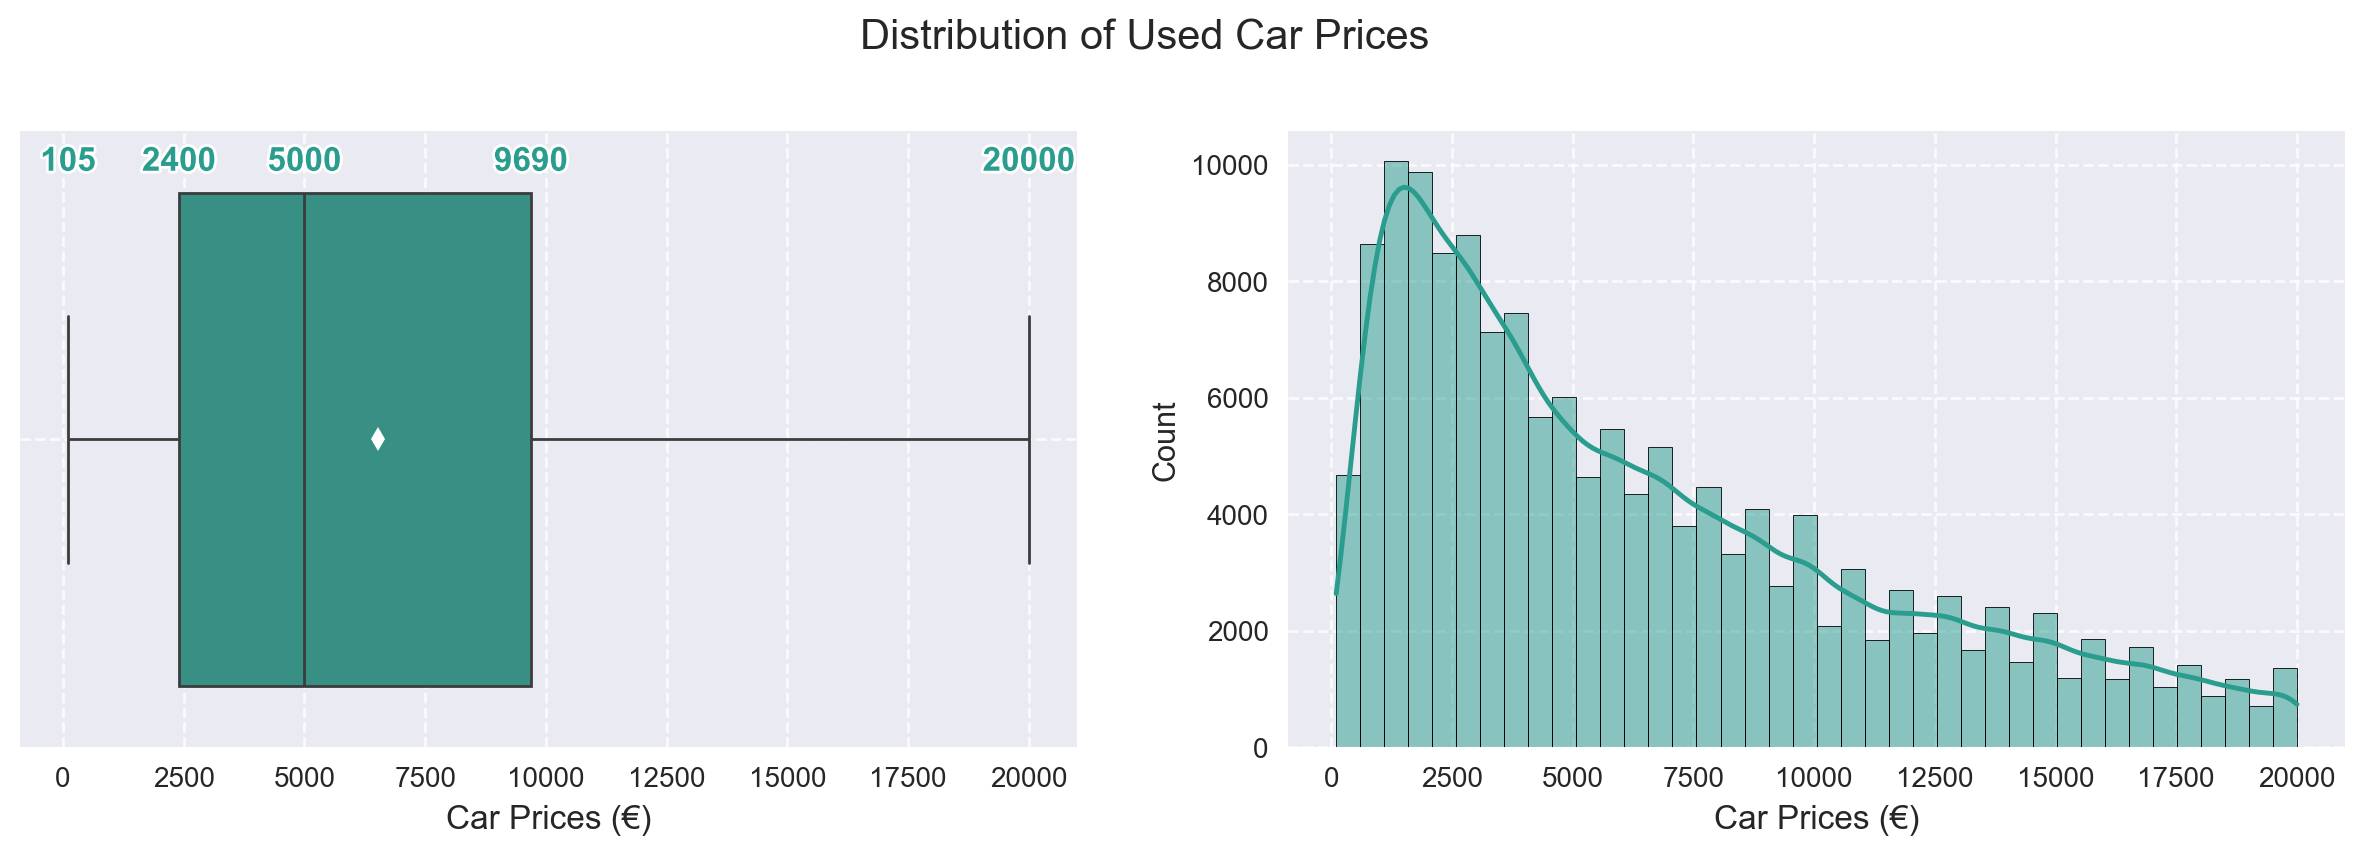

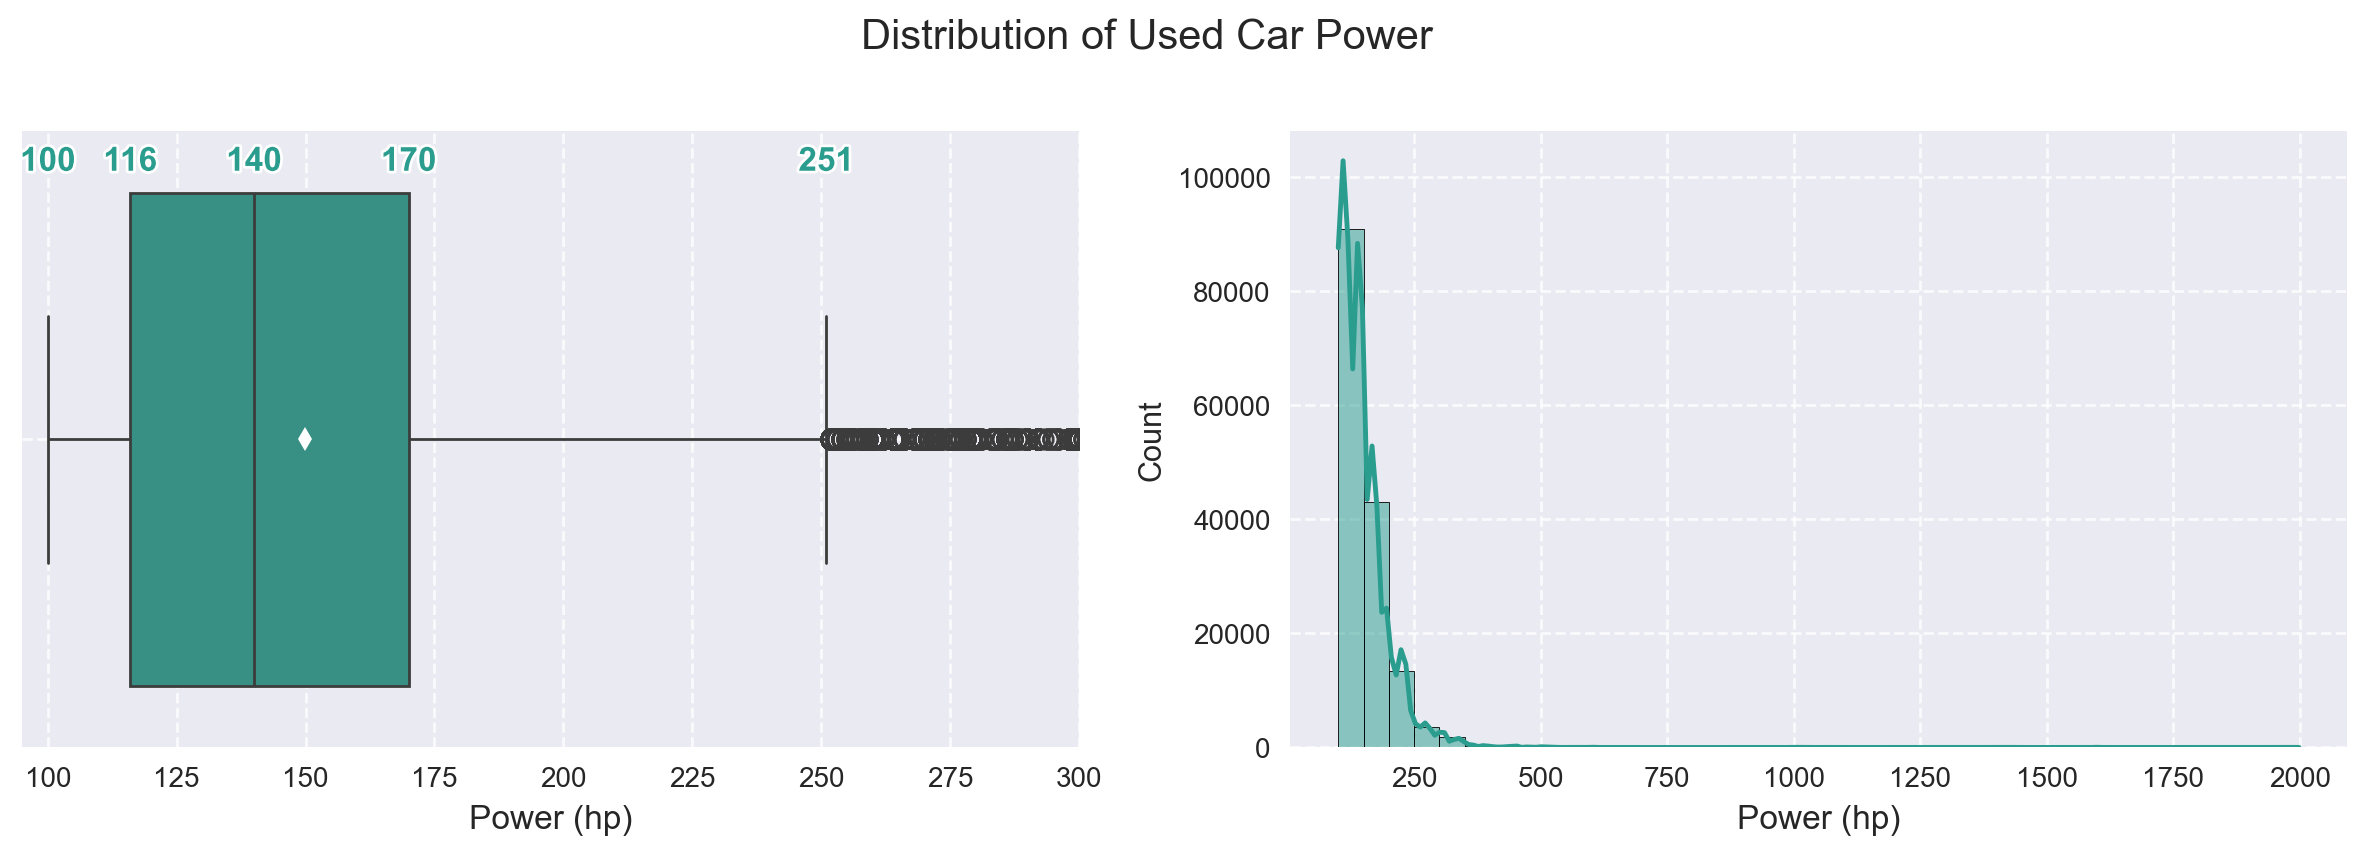

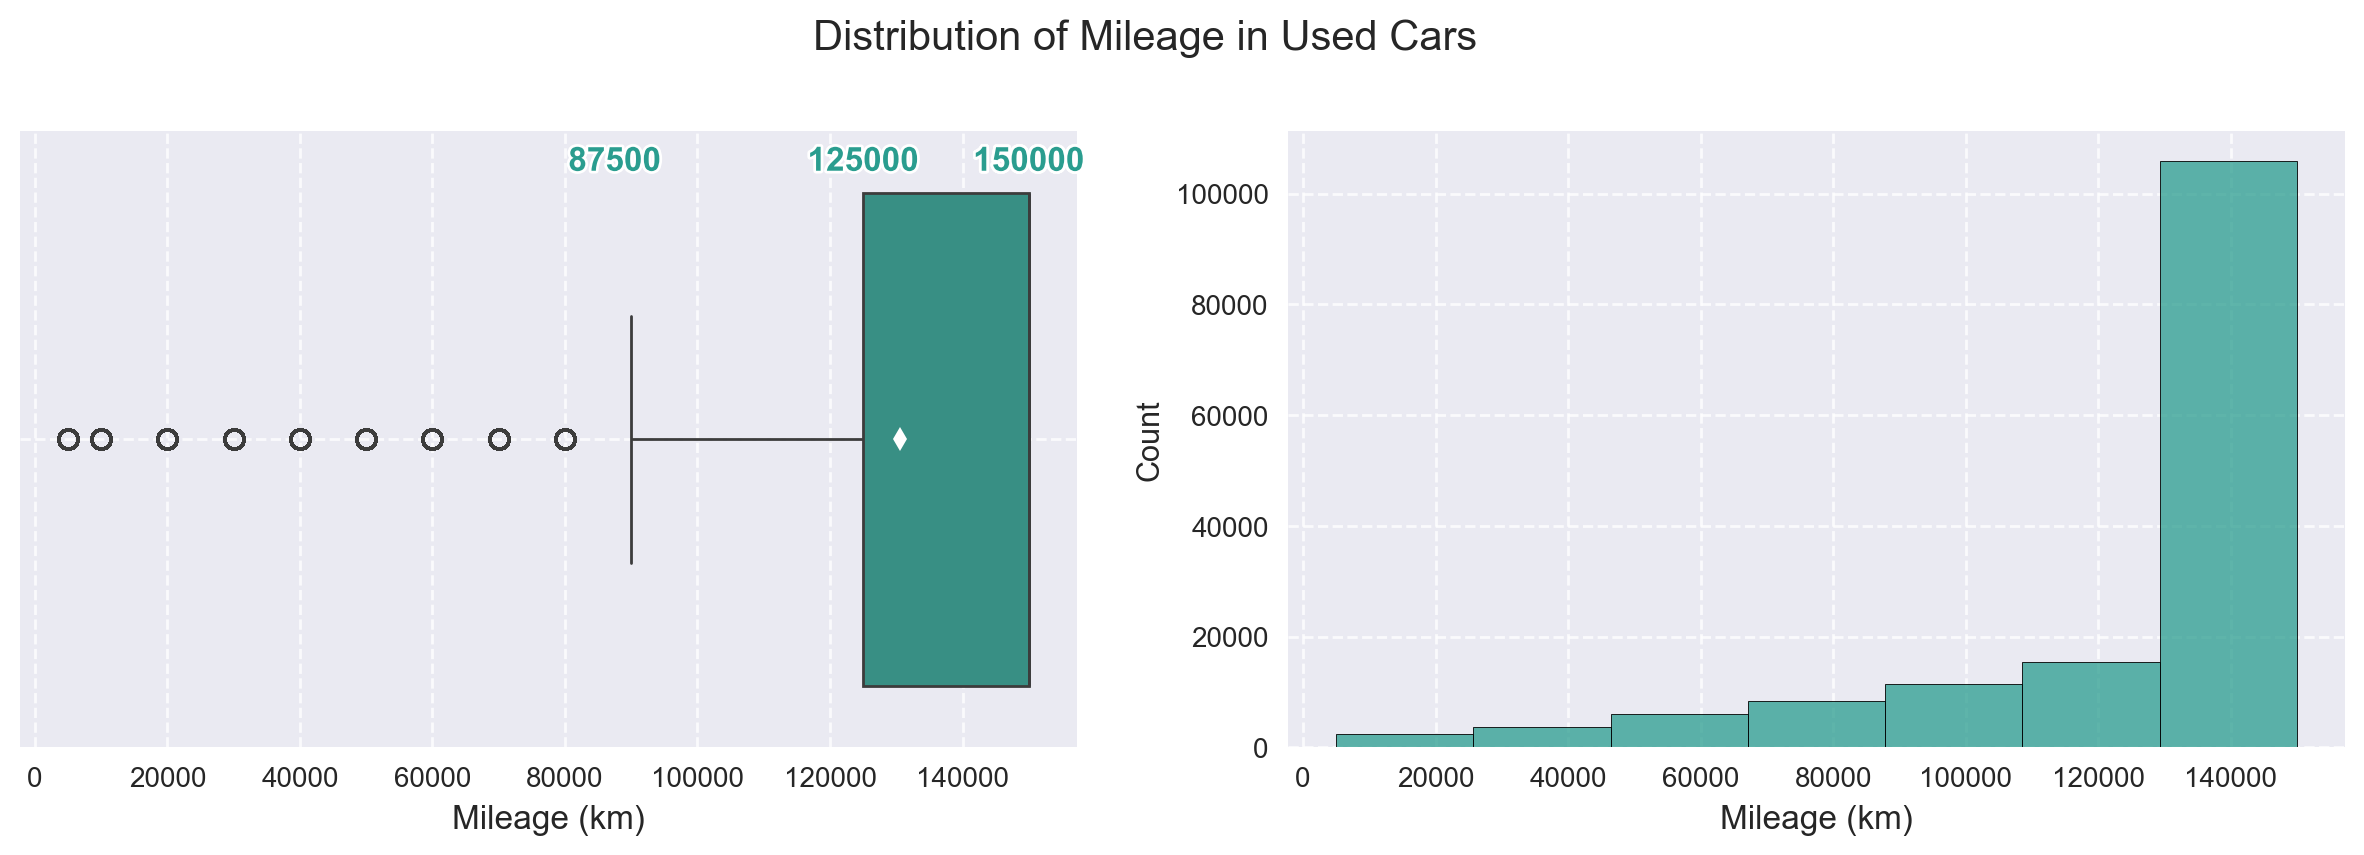

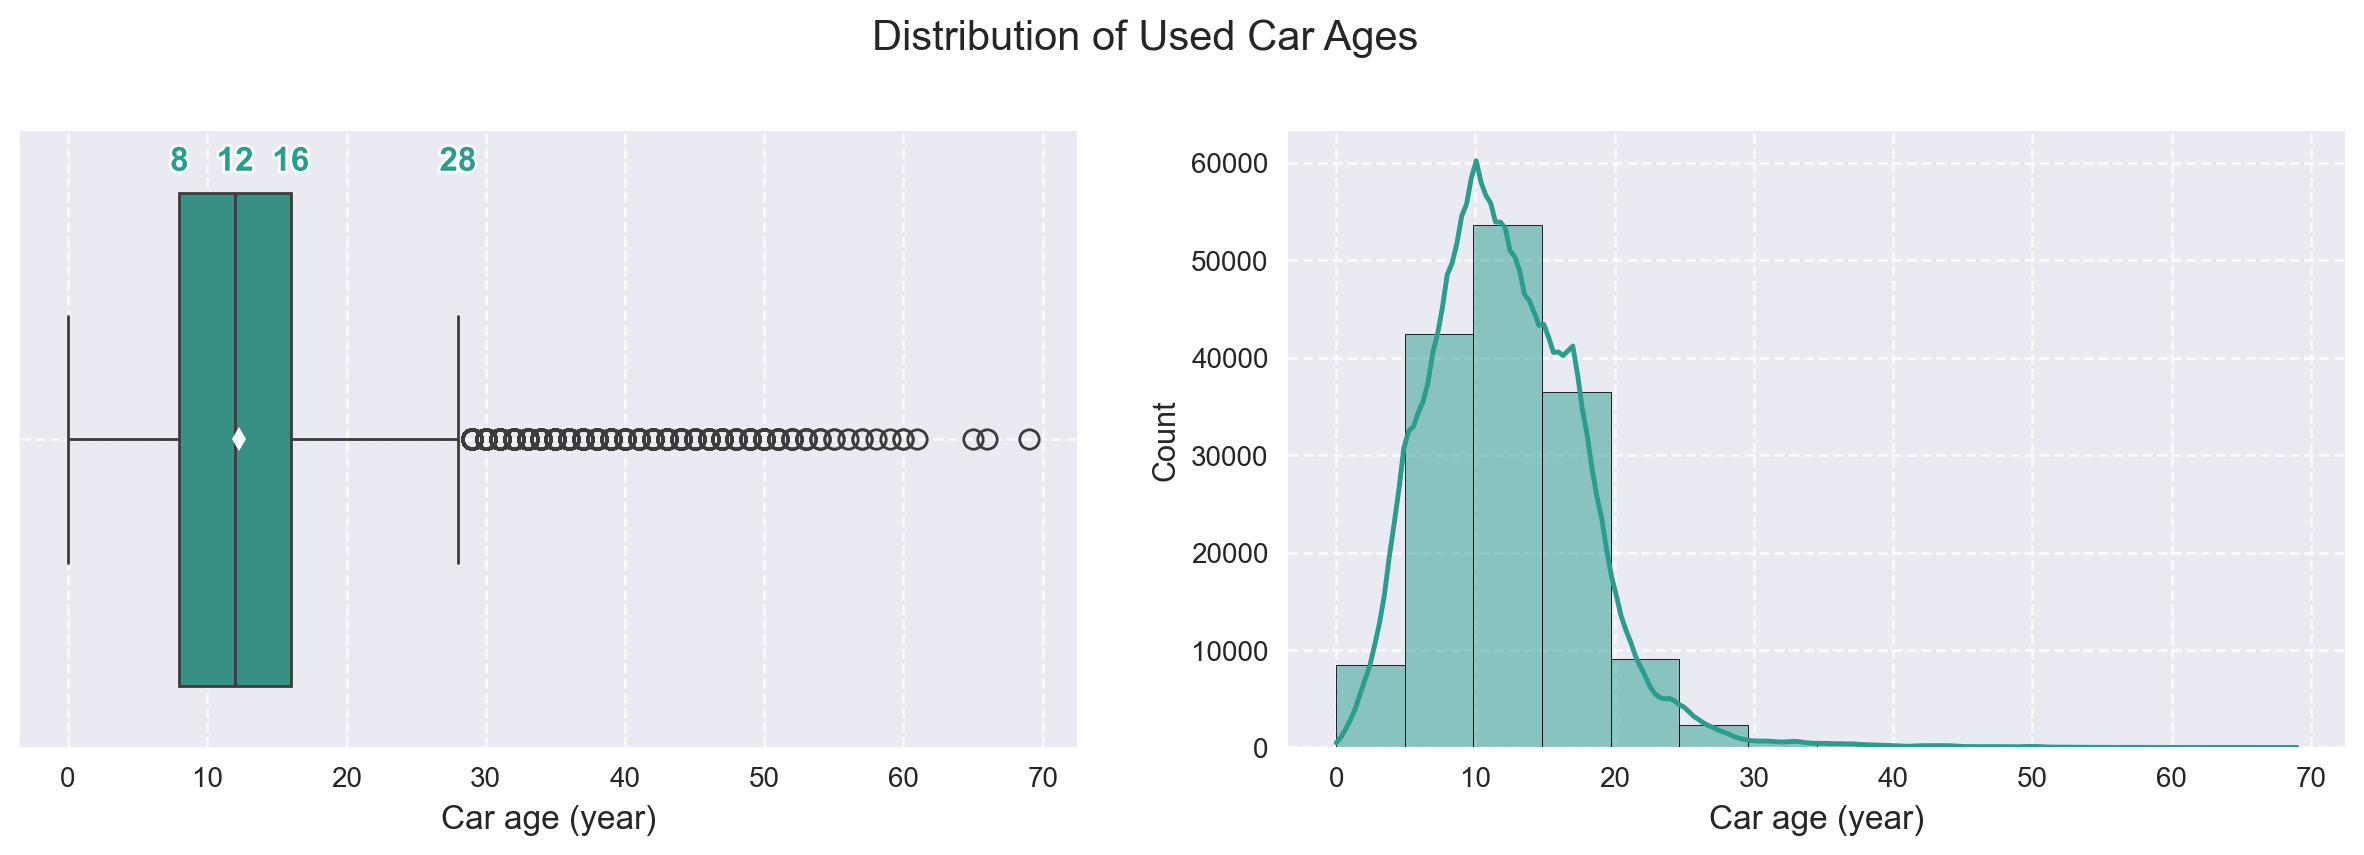

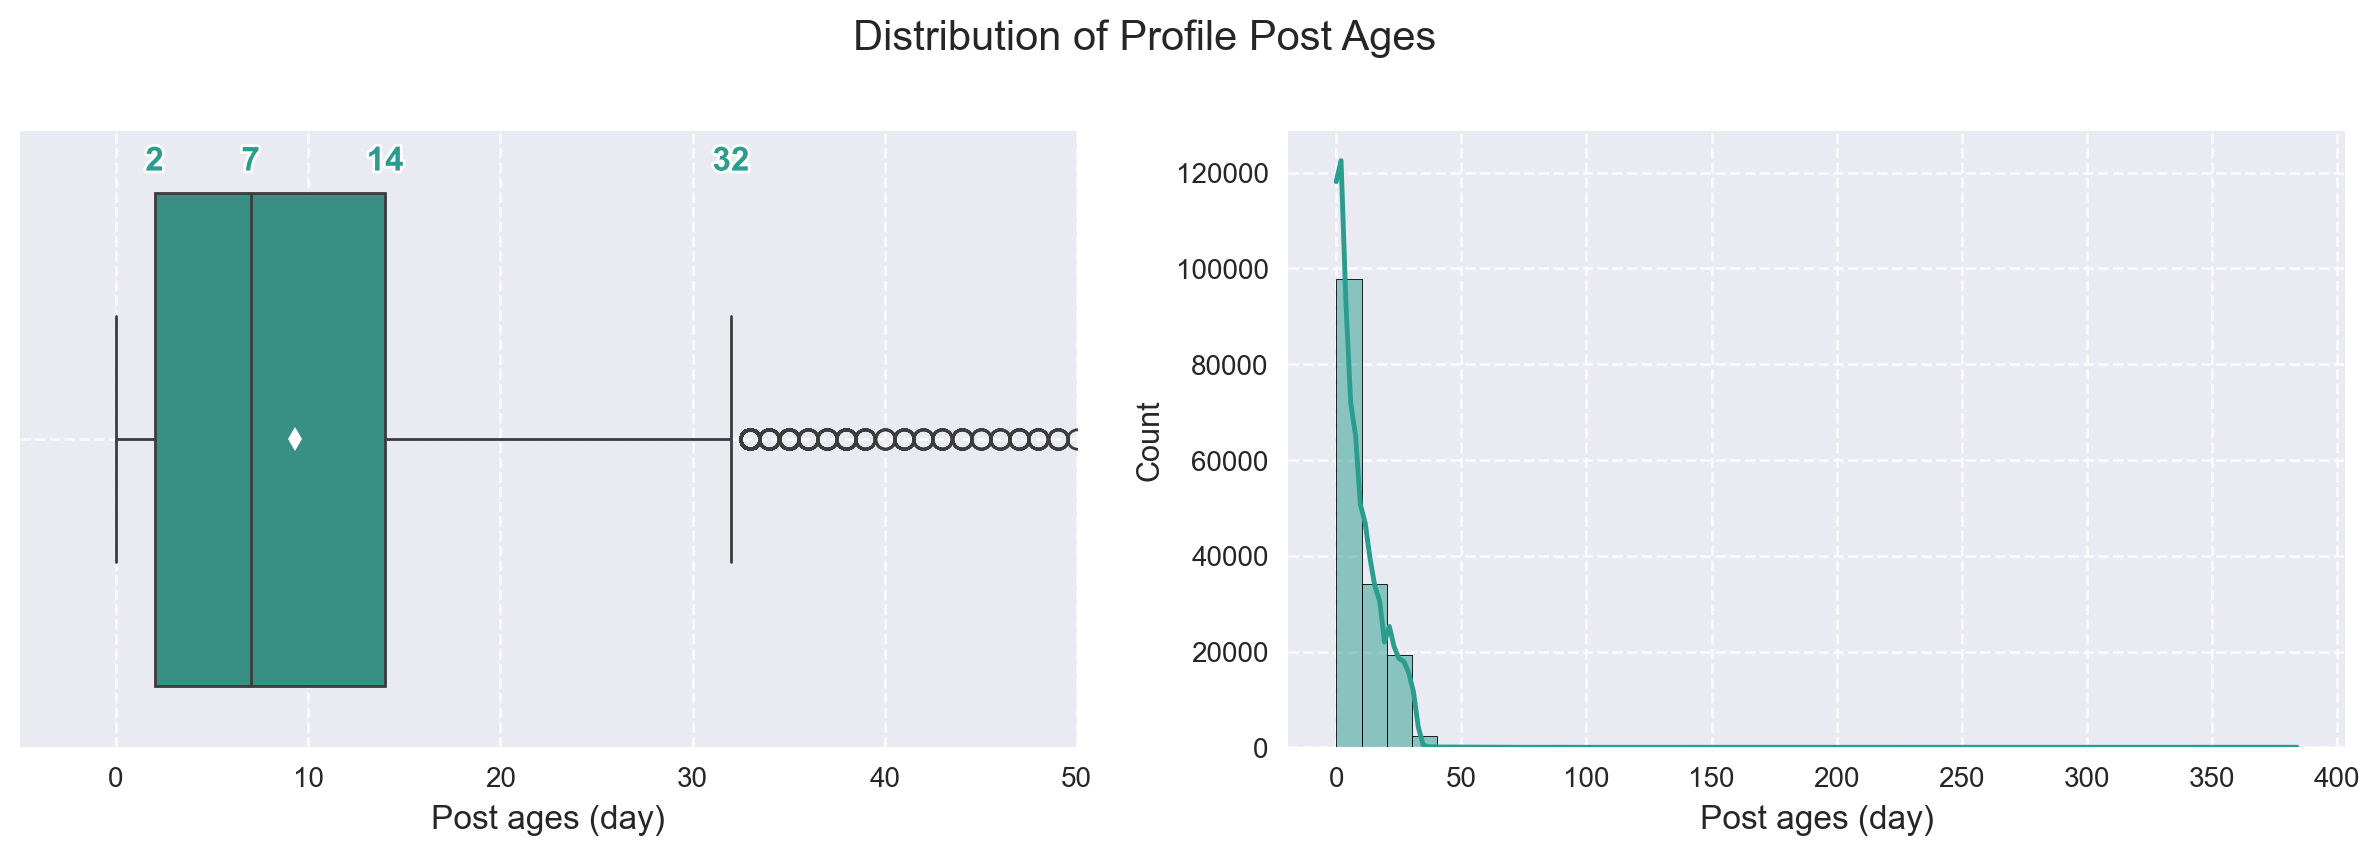

In [25]:
filter_data = cln_df.query("(Price>100)&(car_age>=0)&(2000>Power>=100)")

# distribusi data numerik -- 'Price'
box_hist_plot(df=filter_data, column='Price', size=(15,4), width=500, title="Distribution of Used Car Prices",
                y_title=1.02, xlabel='Car Prices (\u20AC)')

# distribusi data numerik -- 'Power'
box_hist_plot(df=filter_data, column='Power', size=(15,4), width=50, title='Distribution of Used Car Power',
                y_title=1.02, xlabel='Power (hp)', l_xlim=(95,300))

# distribusi data numerik -- 'Mileage'
box_hist_plot(df=filter_data, column='Mileage', size=(15,4), width=20000, title='Distribution of Mileage in Used Cars',
                y_title=1.02, xlabel='Mileage (km)', kde=False)

# distribusi data numerik -- 'car_age'
box_hist_plot(df=filter_data, column='car_age', size=(15,4), width=5, title="Distribution of Used Car Ages",
                y_title=1.02, xlabel='Car age (year)')

# distribusi data numerik -- 'post_age'
box_hist_plot(df=filter_data, column='post_age', size=(15,4), width=10, title="Distribution of Profile Post Ages",
                y_title=1.02, xlabel='Post ages (day)', l_xlim=(-5,50))

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Distribusi harga kendaraan memiliki distribusi *right-skew*, dengan median dan rata-rata pada angka 5000 Euro dan 6530 Euro secara berurutan. Seluruh data berada di dalam area *interquartil range* (IQR), sehingga dapat dikatakan tidak terdapat *outliers* pada data harga kendaraan berdasarkan metode IQR.
* Distribusi tenaga kendaraan memiliki distribusi *right-skew*, dengan median dan rata-rata pada angka 140 hp dan 150 hp secara berurutan. Dari histogram dapat terlihat mobil dengan tenaga bernilai ekstrim (`'Power'`> 400 hp) tetapi dalam frekuensi yang kecil yang dapat dikategorikan sebagai *outlier*.
* Distribusi jarak tempuh kendaraan memiliki distribusi *left-skew* yang menunjukkan bahwa kendaraan pada dataset memiliki kilo meter yang tinggi. Nilai median dan rata-rata untuk jarak tempuh kendaraan, yaitu 150000 kM dan 130626 kM secara berturut-turut. Sebanyak 75% mobil memiliki kilo meter bernilai 125000 kM hingga 150000 kM.
* Distribusi usia kendaraan relatif simetris dengan median dan rata-rata, yaitu senilai 12 tahun. Mayoritas usia mobil yang dijual memiliki usia 0 tahun hingga 28 tahun. Akan tetapi, terdapat sejumlah mobil yang memiliki usia 30 hingga 70 tahun.
* Usia unggahan memiliki distribusi *right-skew*, dengan median dan rata-rata secara berurutan, yaitu 7 hari dan 9 hari. Hal ini menunjukkan bahwa masa aktif pengunggah profil mobil bekas relatif singkat, yaitu sekitar 7 hari setelah melakukan unggahan. Mayoritas data menunjukkan masa aktif penjual dapat mencapai 32 hari setelah melakukan unggahan, sehingga dapat disimpulkan bahwa setelah masa tersebut profil mobil bekas tidak akan banyak dilirik oleh calon pembeli. Hal ini dapat disebabkan oleh banyaknya opsi mobil bekas yang ditawarkan dan/atau disebabkan nilai tawar yang kurang menarik.

</div>

## 2) Variasi Harga Mobil Pada Masing-masing Merek

Berikut di bawah ini merupakan distribusi harga mobil bekas untuk masing-masing merek kendaraan. Distribusi harga kendaraan akan ditampilkan dalam format *boxplot* dan data harga rata-rata kendaraan akan ditampilkan pada *barplot*.

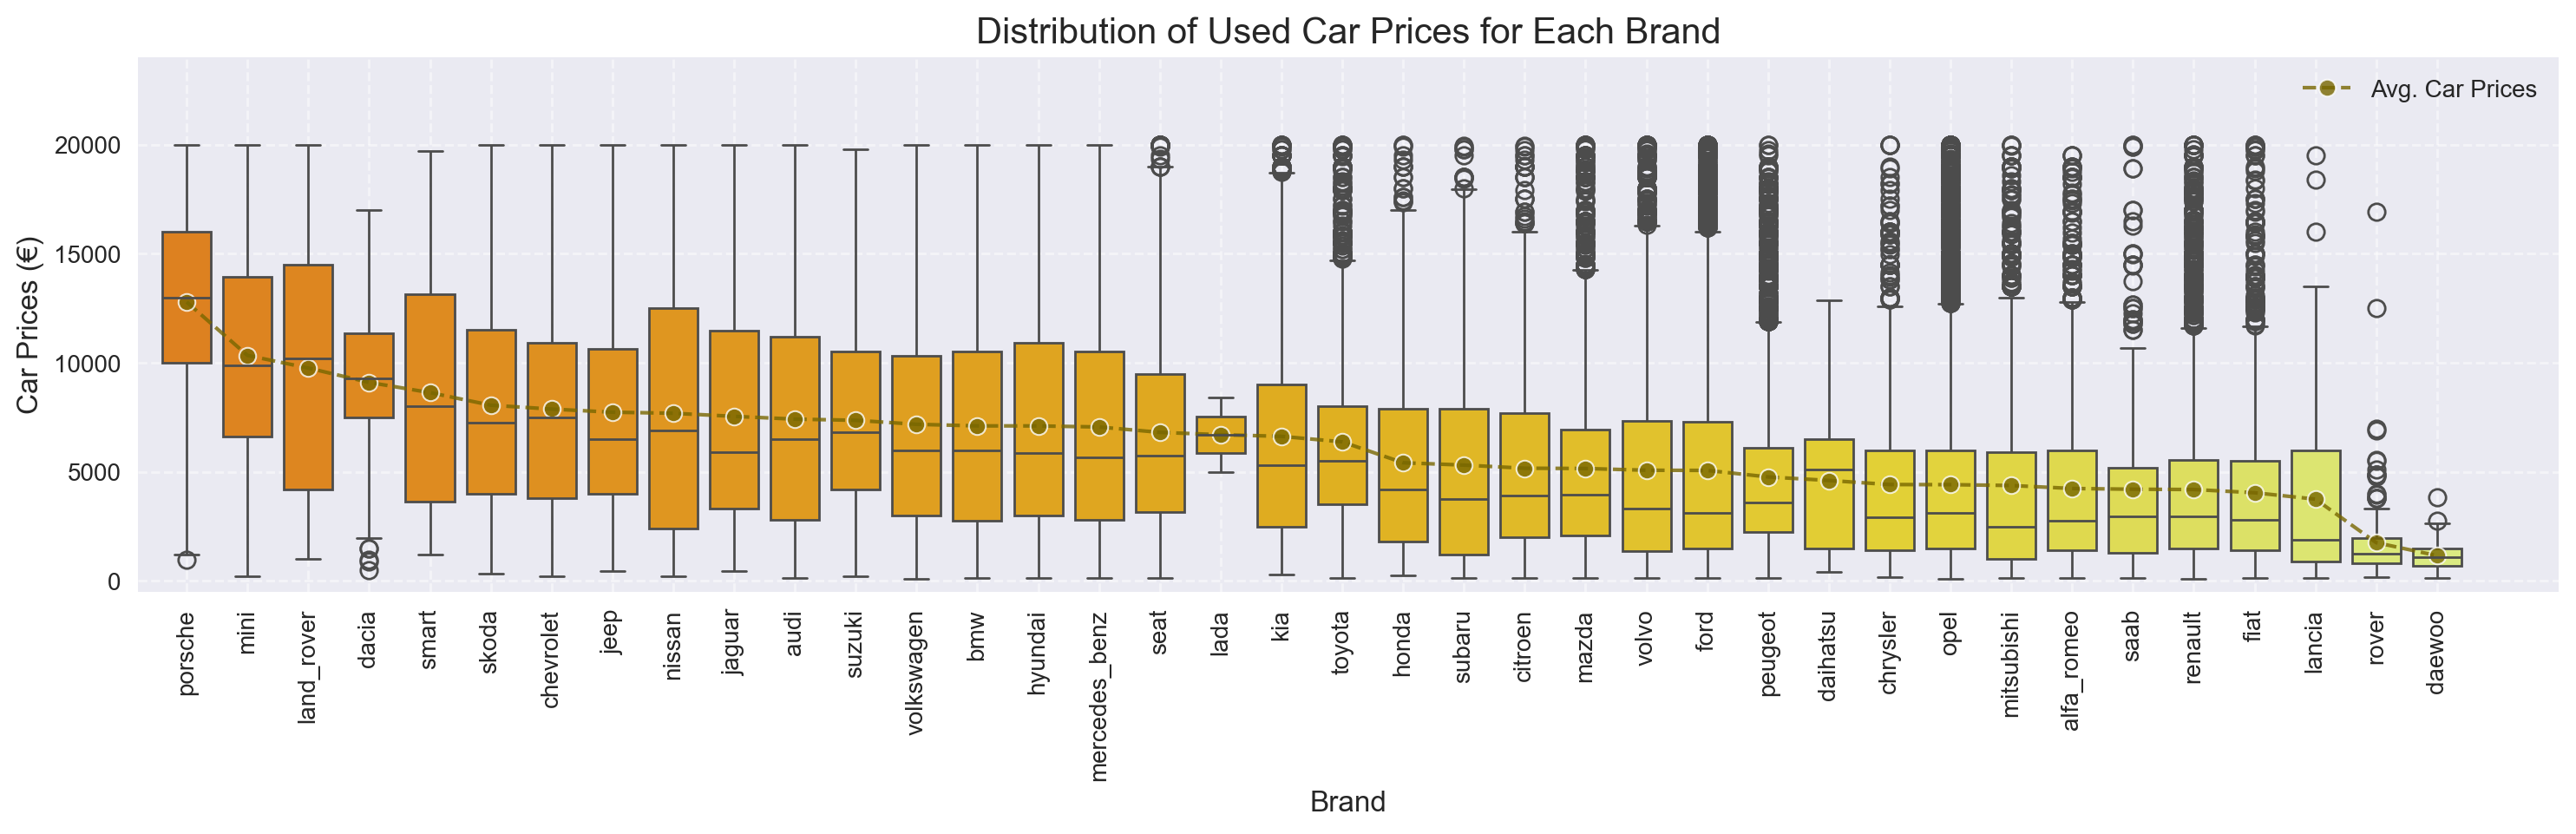

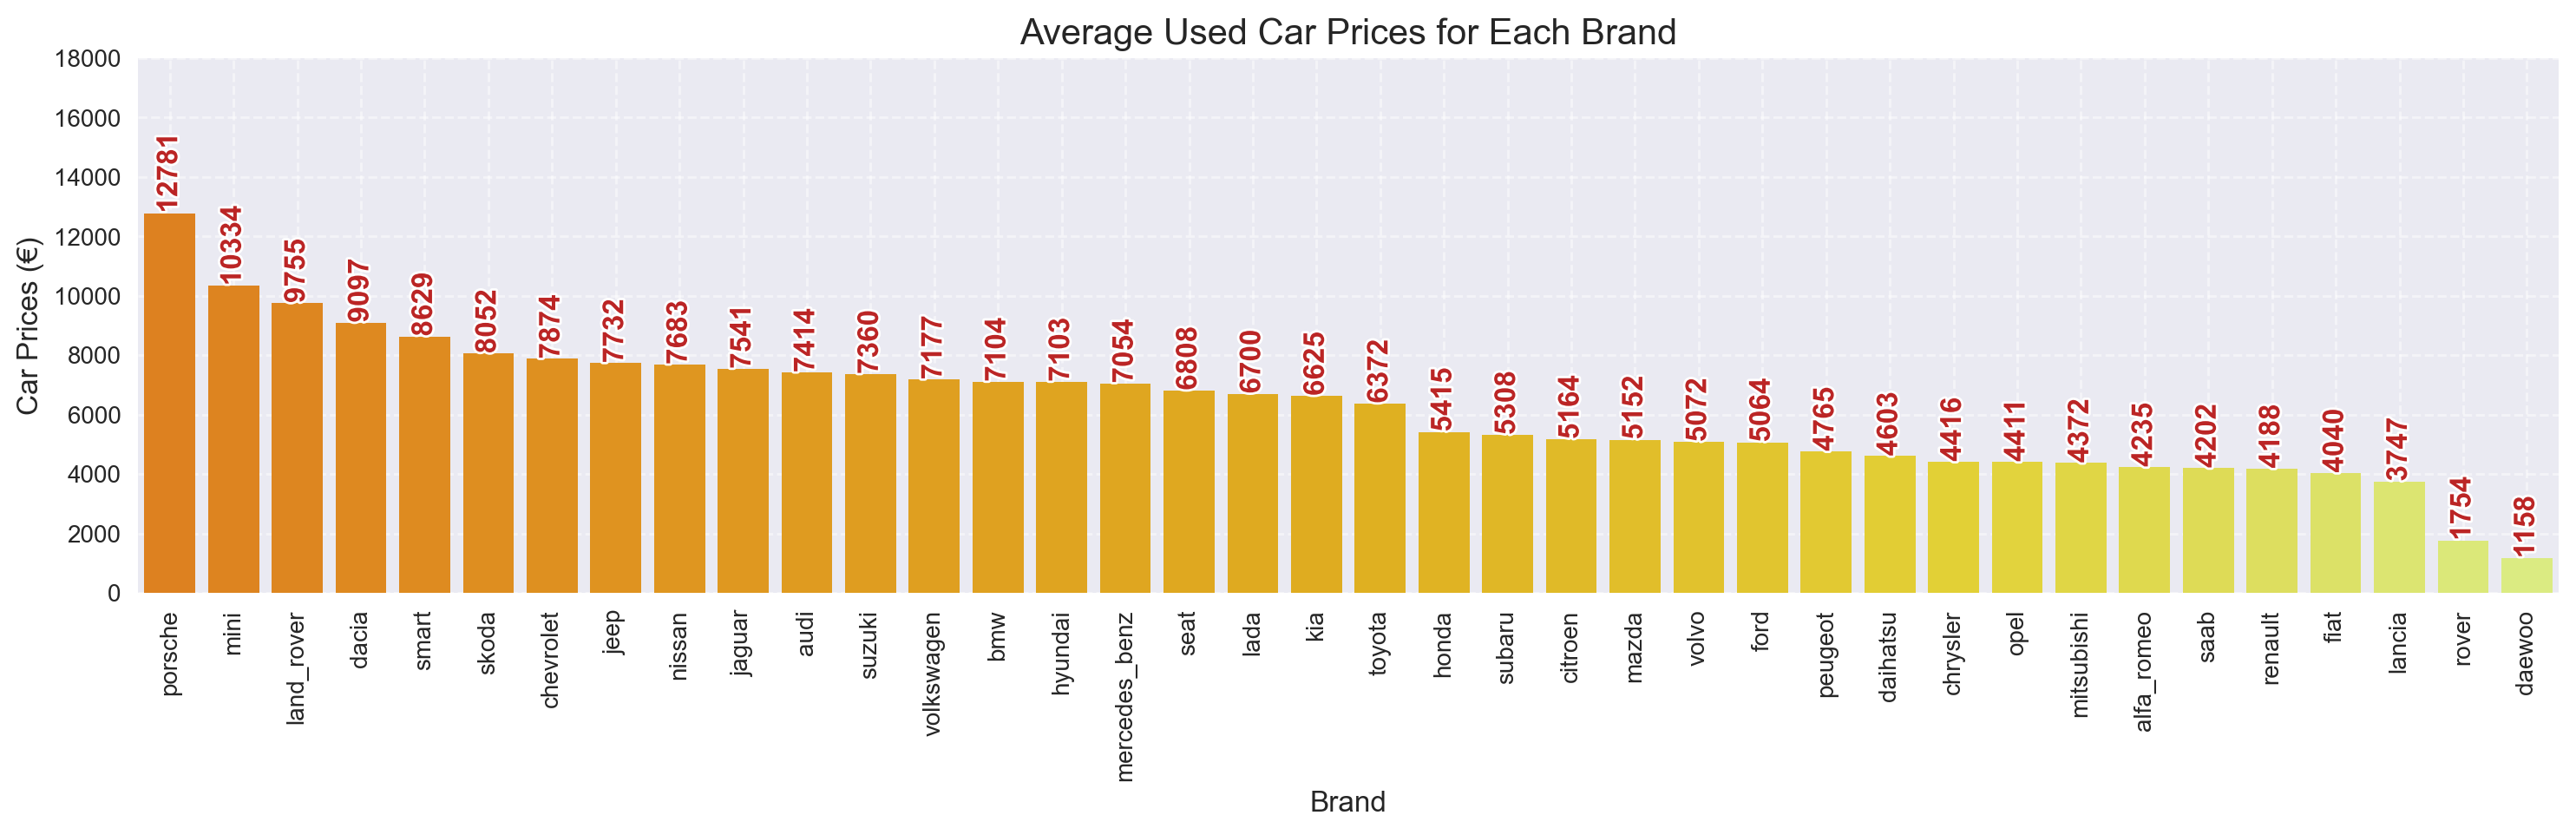

In [26]:
# distribusi harga kendaraan pada setiap merek
line_box_plot(df=filter_data, x='Brand', y='Price', figsize=(18,4), ascending_order=False, rot=90, 
                ylabel='Car Prices (\u20AC)', xlabel='Brand', title='Distribution of Used Car Prices for Each Brand', 
                line_label='Avg. Car Prices', ylim=(-500,24000), xlim=(-0.8,39))

# harga rata-rata mobil bekas pada setiap merek
agg_barplot(df=filter_data, x='Brand', y='Price', figsize=(18,4), ascending_order=False, rot=90, ylim=(0, 18000),
            xlabel='Brand', ylabel='Car Prices (\u20AC)', title='Average Used Car Prices for Each Brand')

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings & Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Top 5** merek mobil bekas dengan harga termahal, yaitu **Porsche**, **Mini**, **Land Rover**, **Dacia**, dan **Smart**. Mobil **Porsche** memiliki kelebihan pada kinerja yang tinggi. **Mini** memiliki keunggulan pada desain yang kompak dan ikonik. **Land Rover** memiliki keunggulan pada segmen *off-road* dan SUV mewah. **Dacia** dan **Smart** unggul sebagai *city car* yang praktis, terjangkau dan kompak.
* Secara umum, distribusi harga mobil bekas pada masing-masing *brand* memiliki distribusi *right-skew*. Hal ini menunjukkan bahwa mayoritas brand mobil bekas memiliki harga dibawah rata-rata.

</div>



## 3) Pengaruh Tipe Kendaraan Terhadap Harga Mobil

Berikut di bawah ini merupakan distribusi harga mobil bekas untuk masing-masing tipe kendaraan. Distribusi harga kendaraan akan ditampilkan dalam format *boxplot* dan data harga rata-rata kendaraan akan ditampilkan pada *barplot*.

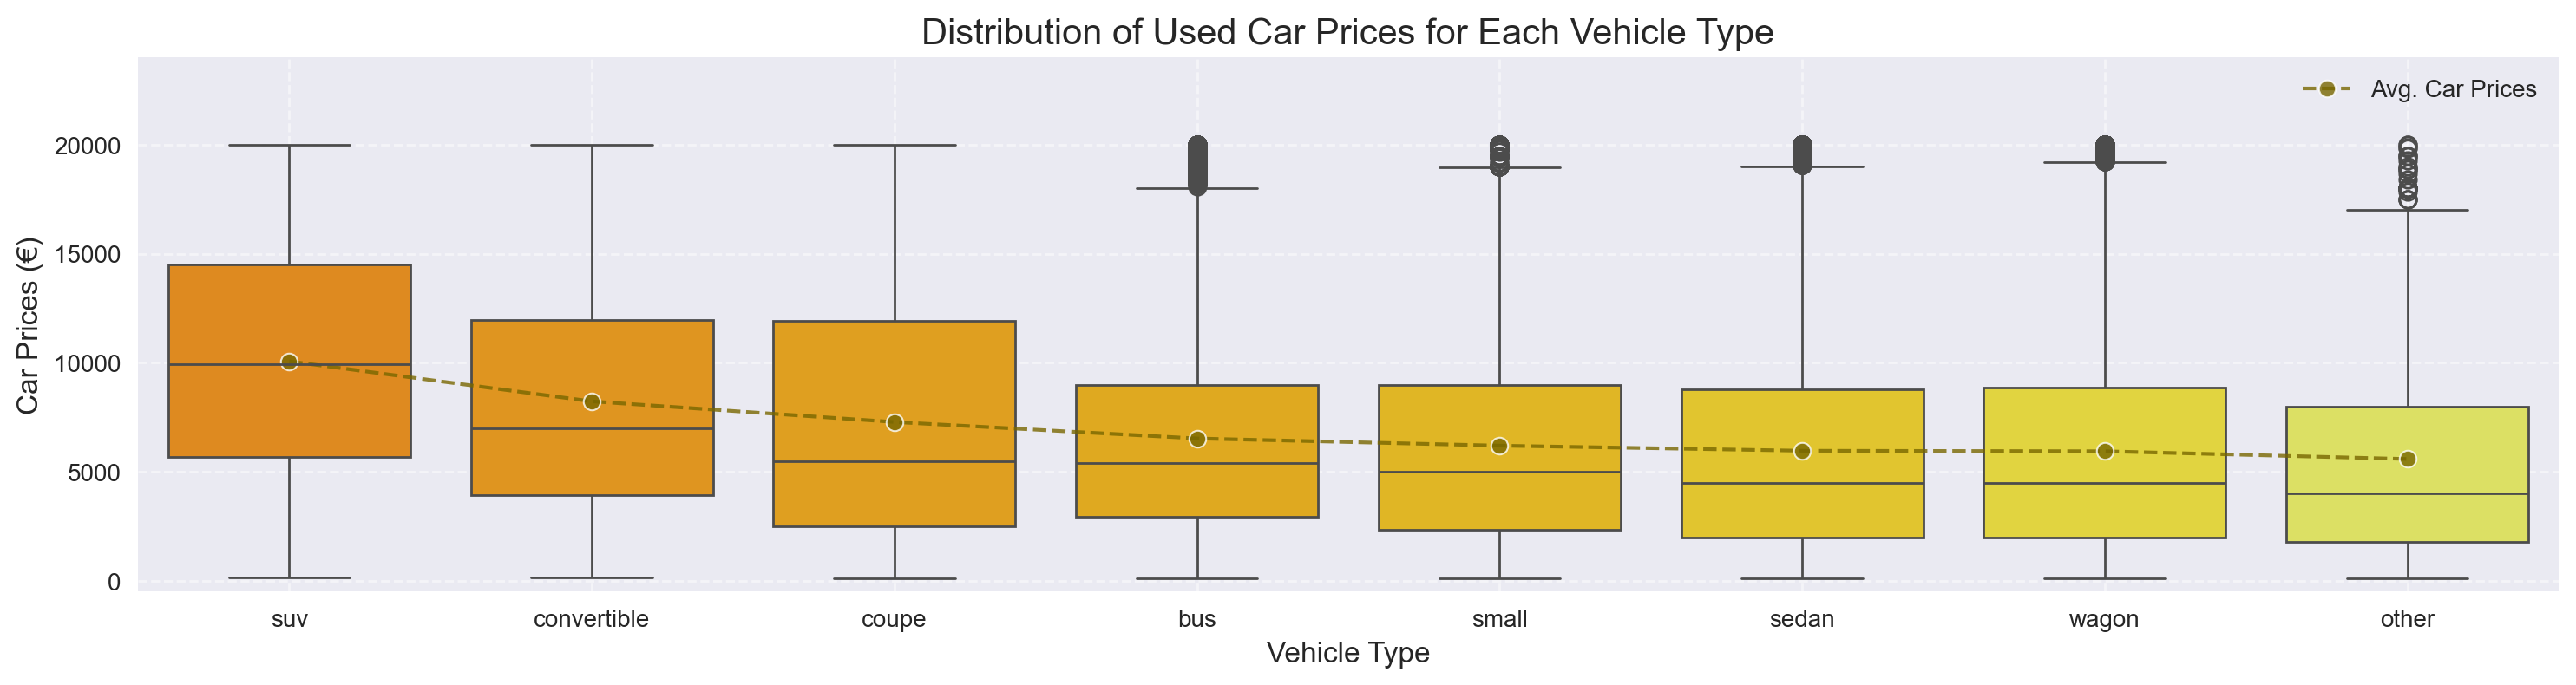

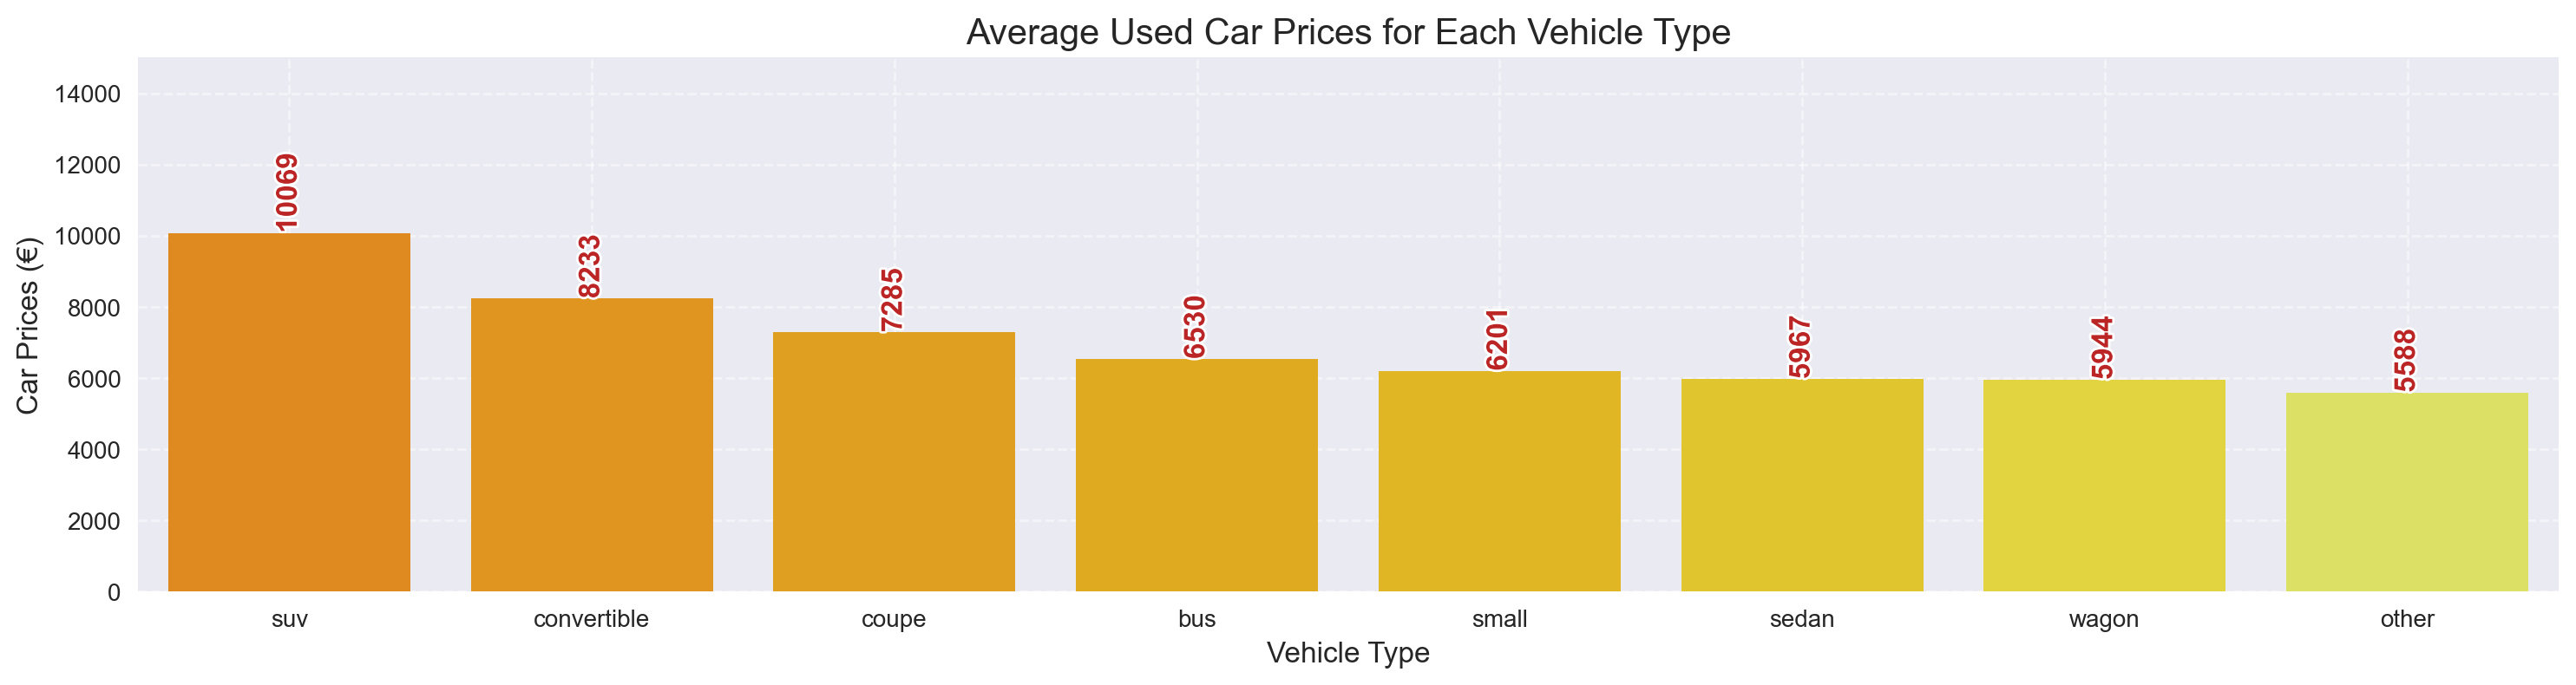

In [27]:
# distribusi harga kendaraan pada setiap tipe kendaraan
line_box_plot(df=filter_data, x='VehicleType', y='Price', figsize=(18,4), ascending_order=False, rot=0, 
                ylabel='Car Prices (\u20AC)', xlabel='Vehicle Type', title='Distribution of Used Car Prices for Each Vehicle Type',
                line_label='Avg. Car Prices', ylim=(-500,24000), xlim=(-0.5,7.5))

# harga rata-rata mobil bekas pada setiap tipe kendaraan
agg_barplot(df=filter_data, x='VehicleType', y='Price', figsize=(18,4), ascending_order=False, rot=0, ylim=(0, 15000),
            xlabel='Vehicle Type', ylabel='Car Prices (\u20AC)', title='Average Used Car Prices for Each Vehicle Type')

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Top 3** tipe mobil bekas dengan harga termahal, yaitu **SUV**, **Convertible**, dan **Coupe**.
* Distribusi harga mobil bekas pada masing-masing tipe memiliki distribusi *right-skew*. Hanya tipe **SUV** yang dapat dikatakan memiliki distribusi harga yang simetris.
</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari 3 tipe kendaraan dengan harga termahal, hanya **SUV** yang berukuran besar dan cocok sebagai mobil keluarga sedangkan 2 lainnya merupakan mobil yang berukuran relatif kecil. Mobil **Convertibel** dengan ciri khasnya yaitu *roof* yang dapat dibuka menjadi nilai lebih sedangkan tipe **Coupe** memiliki keunggulan dari sisi aerodinamika dan identik dengan 2 pintu yang memberikan tampilan yang lebih *sporty* dan dinamis.
* Distribusi *right-skew* pada setiap tipe kendaraan menunjukkan mayoritas mobil bekas pada masing-masing tipe memiliki harga dibawah rata-rata.

</div>



## 4) Bagaimana Jenis Bahan Bakar Mempengaruhi Harga Mobil?

Berikut di bawah ini merupakan distribusi harga mobil bekas untuk masing-masing jenis bahan bakar yang digunakan. Distribusi harga kendaraan akan ditampilkan dalam format *boxplot* dan data harga rata-rata kendaraan akan ditampilkan pada *barplot*.

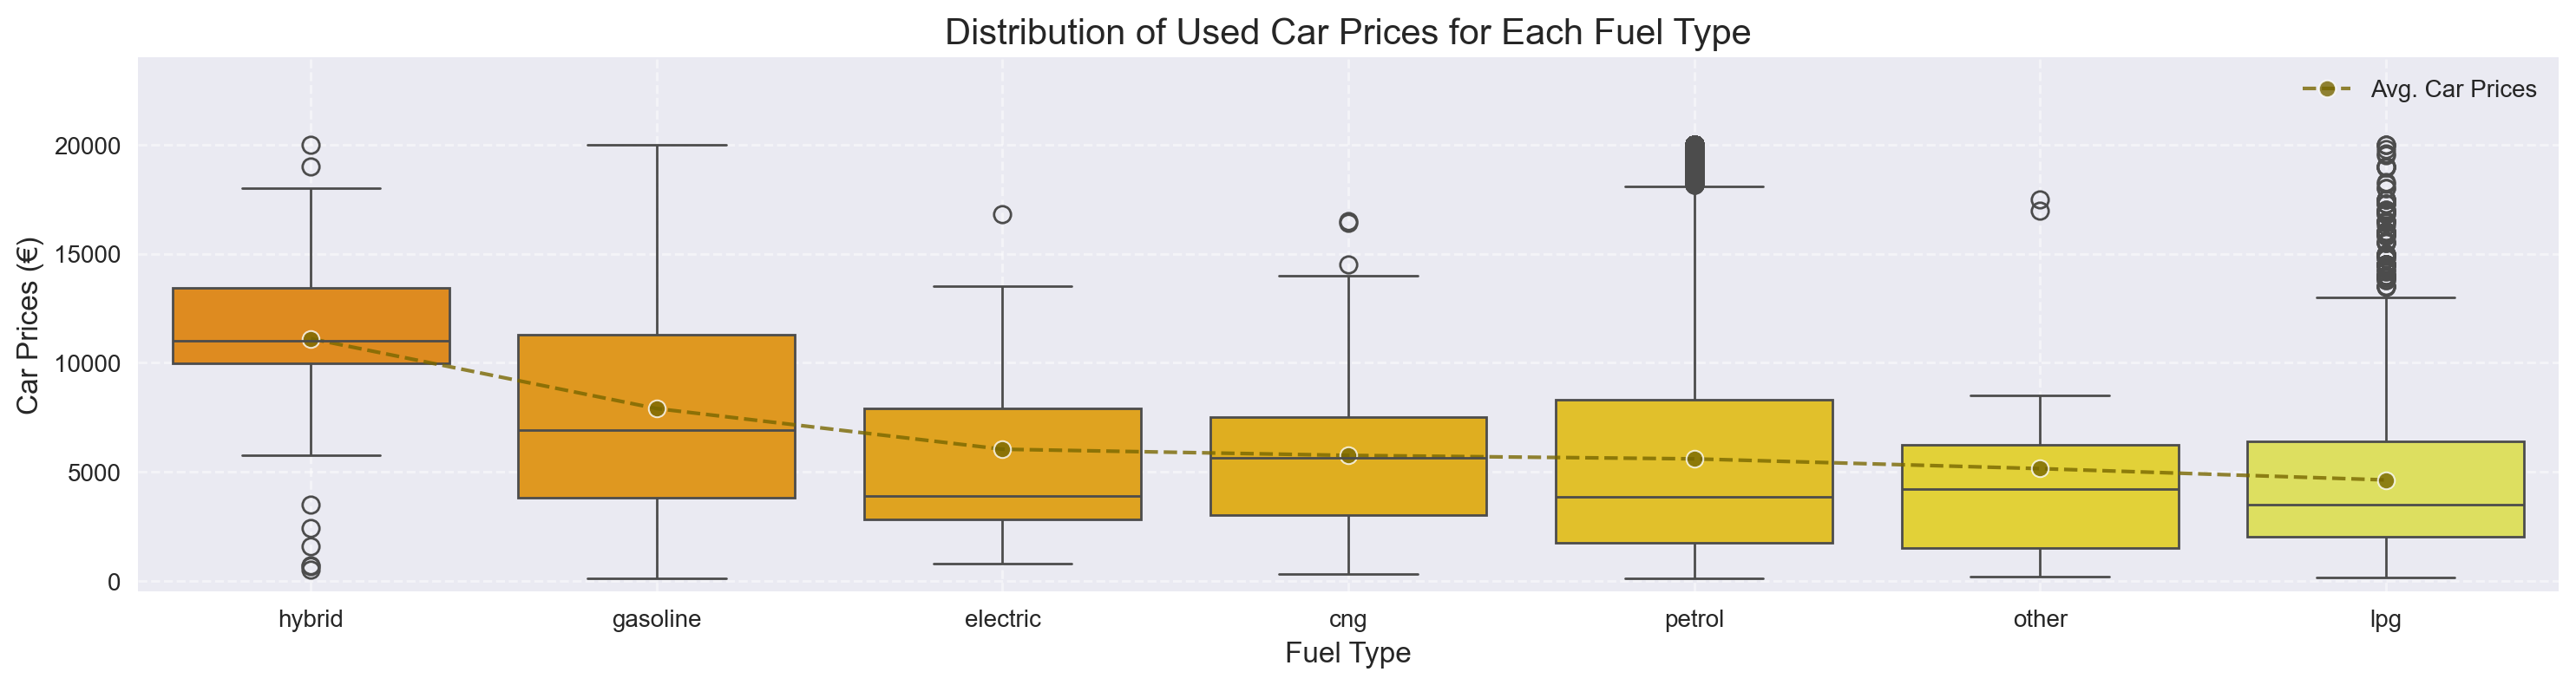

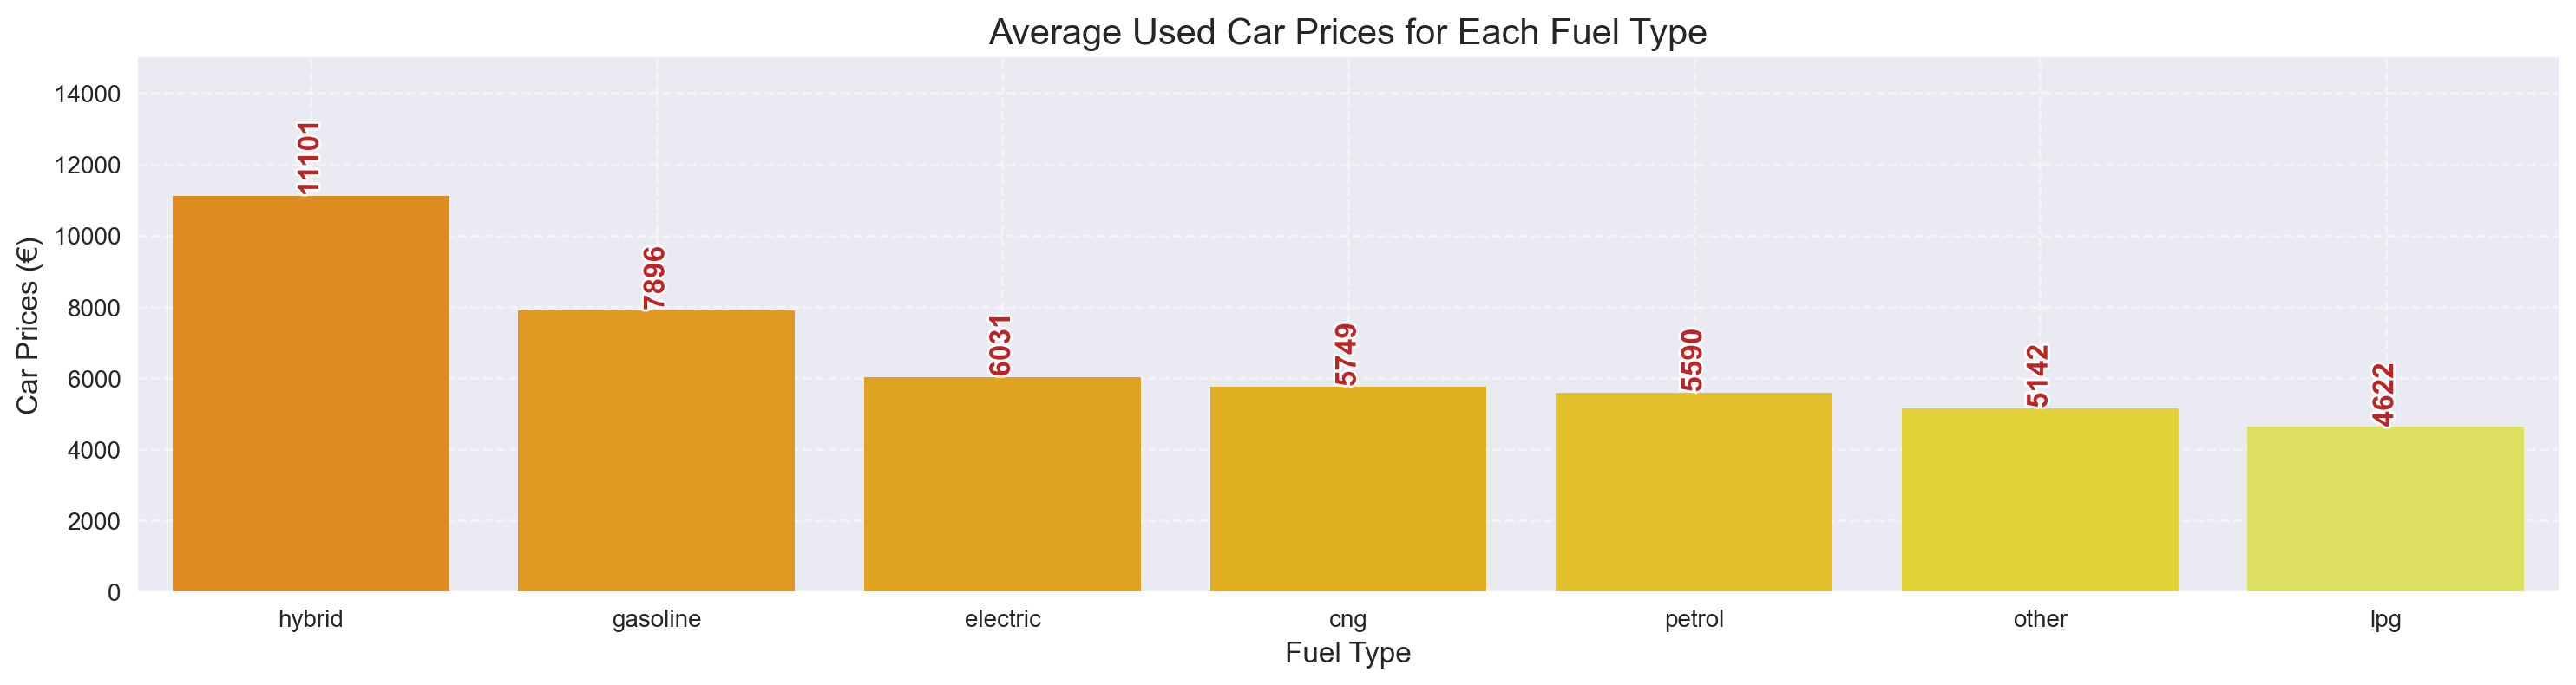

In [28]:
# distribusi harga kendaraan pada setiap jenis bahan bakar
line_box_plot(df=filter_data, x='FuelType', y='Price', figsize=(18,4), ascending_order=False, rot=0, 
                ylabel='Car Prices (\u20AC)', xlabel='Fuel Type', title='Distribution of Used Car Prices for Each Fuel Type',
                line_label='Avg. Car Prices', ylim=(-500,24000), xlim=(-0.5,6.5))

# harga rata-rata mobil bekas pada setiap jenis bahan bakar
agg_barplot(df=filter_data, x='FuelType', y='Price', figsize=(18,4), ascending_order=False, rot=0, ylim=(0, 15000),
            xlabel='Fuel Type', ylabel='Car Prices (\u20AC)', title='Average Used Car Prices for Each Fuel Type')

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* **Top 3** mobil bekas dengan harga termahal berdasarkan bahan bakar yang digunakan, yaitu mobil **Hybrid**, **Gasoline** dan **Electric**.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari 3 jenis kendaraan tersebut, 2 diantaranya memiliki teknologi energi non-fosil, yaitu **Hybrid** dan **Electric**. Teknologi yang lebih maju dan isu lingkungan mengakibatkan mobil tersebut memiliki harga yang lebih mahal. Adapun mobil **Gasoline** merupakan tipe mobil yang umum digunakan karena kemudahan perolehan energi.

</div>



## 5) Harga Mobil Untuk Jenis Transmisi yang Berbeda

Berikut di bawah ini merupakan distribusi harga mobil bekas untuk masing-masing jenis transmisi yang digunakan. Distribusi harga kendaraan akan ditampilkan dalam format *boxplot* dan data harga rata-rata kendaraan akan ditampilkan pada *barplot*.

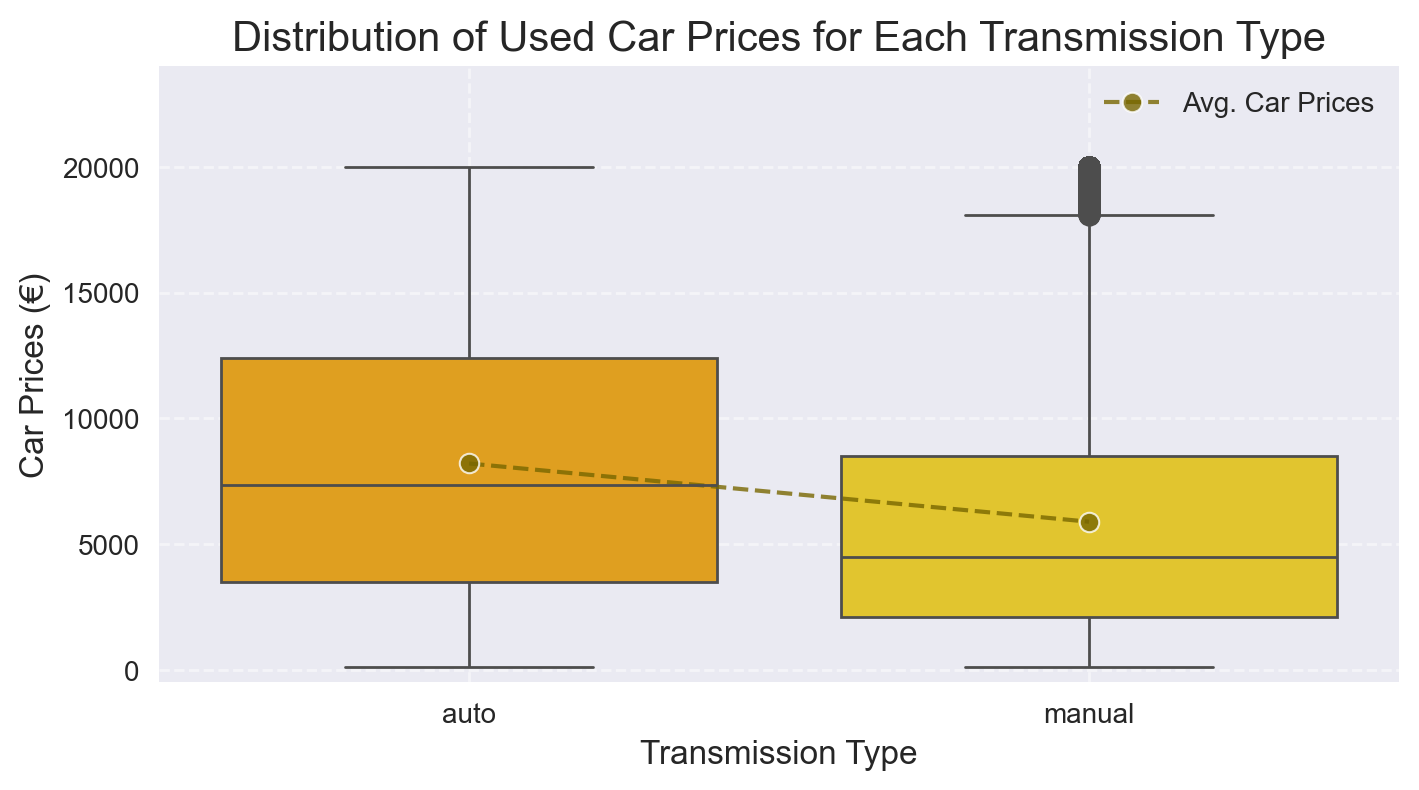

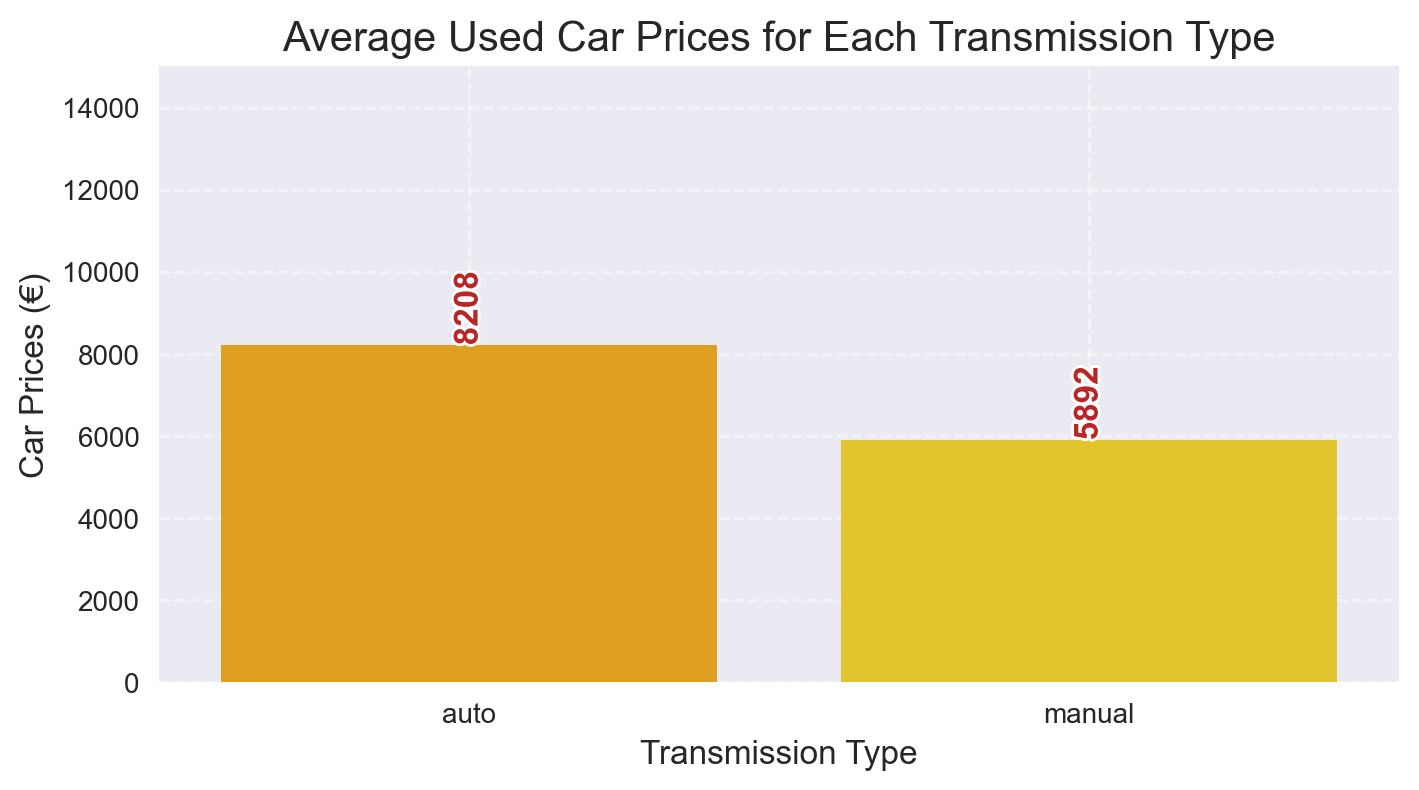

In [29]:
# distribusi harga kendaraan pada setiap jenis transmisi
line_box_plot(df=filter_data, x='Gearbox', y='Price', figsize=(8,4), ascending_order=False, rot=0, 
                ylabel='Car Prices (\u20AC)', xlabel='Transmission Type', 
                title='Distribution of Used Car Prices for Each Transmission Type',
                line_label='Avg. Car Prices', ylim=(-500,24000), xlim=(-0.5,1.5))

# harga rata-rata mobil bekas pada setiap jenis transmisi
agg_barplot(df=filter_data, x='Gearbox', y='Price', figsize=(8,4), ascending_order=False, rot=0, ylim=(0, 15000),
            xlabel='Transmission Type', ylabel='Car Prices (\u20AC)', 
            title='Average Used Car Prices for Each Transmission Type')

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Mobil dengan transmisi **Automatic** memiliki harga tipikal yang lebih besar dari transmisi **Manual**.
* Rata-rata harga jual mobil **Automatic** 39% lebih mahal dari rata-rata harga jual mobil **Manual**.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Teknologi yang lebih maju dan kemudahan yang diberikan pada pengguna mengakibatkan mobil **Automatic** memiliki harga jual yang lebih tinggi.

</div>



## 6) Korelasi Antar Variabel Numerik

Untuk mengetahui bagaimana hubungan antar fitur numerik, maka kita perlu melakukan perhitungan korelasi *Pearson*. Berikut di bawah ini akan ditampilkan *heatmap plot* yang menunjukkan nilai korelasi antar variabel tersebut.

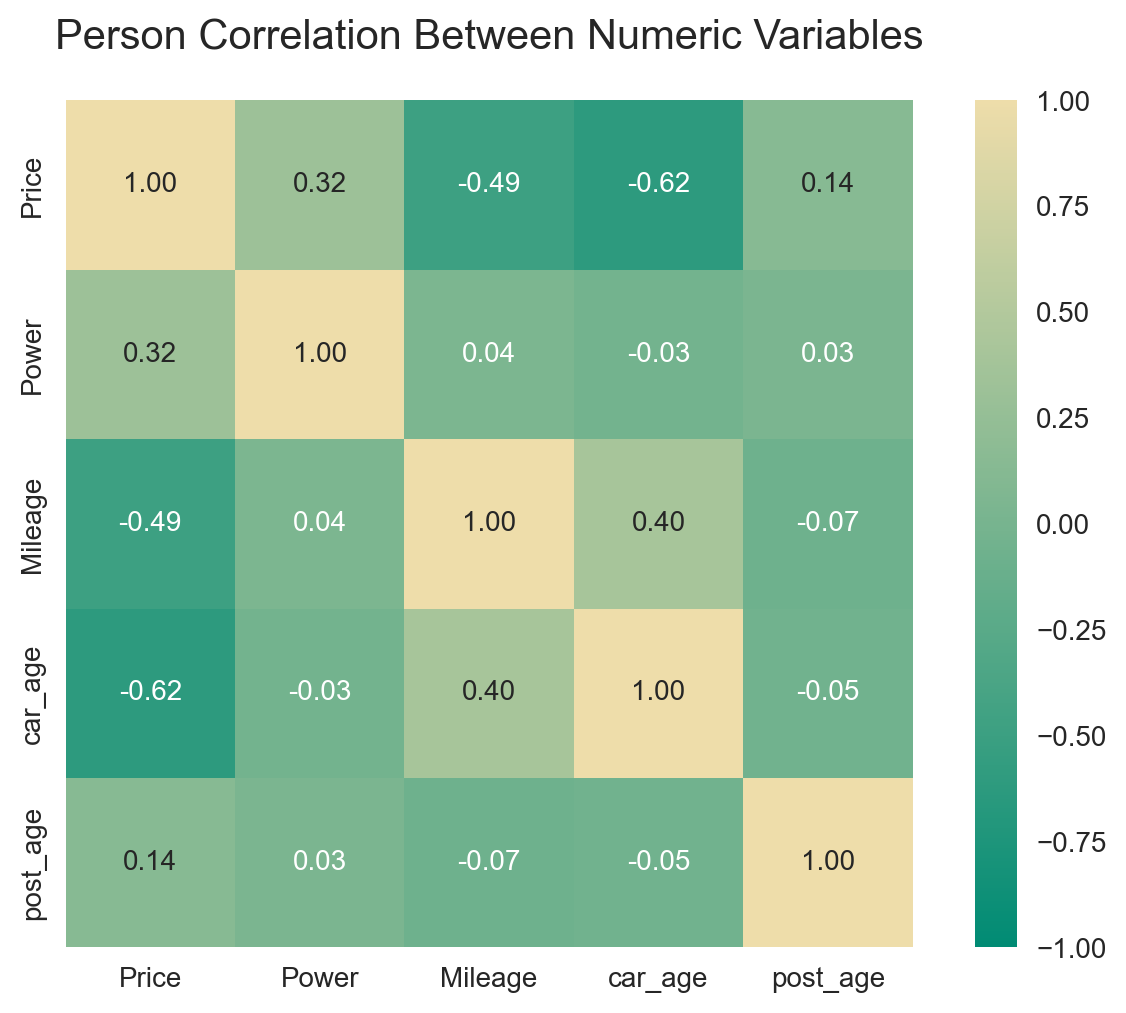

In [30]:
# korelasi peparson antar variabel numerik
sns.heatmap(data=filter_data[['Price', 'Power', 'Mileage', 'car_age', 'post_age']].corr(), 
            annot=True, square=True, vmax=1, vmin=-1, 
            cmap=sns.color_palette("blend:#008B74,#EDA", as_cmap=True), fmt='.2f')
plt.title("Person Correlation Between Numeric Variables", y=1.04, size=15)
plt.show()

<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Findings</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Variabel `'Power'`, `'Mileage'`, dan `'car_age'` menunjukkan korelasi yang kuat terhadap variabel `'Price'` dibandingkan variabel lainnya. 
* Hubungan variabel `'Price'` terhadap variabel `'Mileage'` dan `'car_age'` menujukkan korelasi negatif, yang berarti peningkatan kedua variabel tersebut akan menurunkan nilai variabel `'Price'`. Adapun hubungan variabel `'Price'` terhadap variabel `'Power'` menunjukkan korelasi positif, yang berarti peningkatan variabel tersebut akan meningkatkan nilai variabel `'Price'`.

</div>



<div style="font-size:25px; font-weight:bold; font-family:Trebuchet MS">Insights</div>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Usia mobil yang lebih tua dan jarak tempuh yang lebih tinggi, akan mengakibatkan harga jual mobil tersebut bernilai lebih rendah.
* Kapasitas tenaga mesin yang besar akan mengakibatkan harga jual mobil semakin tinggi.

</div>



## 7) Penanganan *Outliers*

Pada bagian sebelumnya ditemukan sejumlah data abnormal yang diindikasikan sebagai *outliers*, yaitu harga mobil yang terlampau murah, usia kendaraan bernilai negatif, kendaraan dengan tenaga sangat kecil atau sangat besar. Oleh karena itu, pada sesi ini kita akan memutuskan batas normal dari variabel-variabel tersebut, yakni:
* Mobil bekas dalam kondisi buruk sekalipun, nilai jual material dan suku cadangnya masih dapat dihargai di atas 100 Euro.
* Usia kendaraan bernilai negatif merupakan suatu kondisi yang tidak wajar.
* Mobil dengan tenaga kurang dari 100 hp adalah kondisi yang tidak wajar. Umumnya mobil standard memiliki daya pada rentang 100-300 hp.
* Hingga masa sekarang (tahun 2023), *super car* belum dapat menembus kapasitas tenaga hingga 2000 hp.

Berikut di bawah ini, akan dilakukan proses filtrasi *outliers* dari dataset.

In [31]:
# membuang outliers
cln_df = cln_df.query("(Price>100)&(car_age>=0)&(2000>Power>=100)").reset_index(drop=True)

# output
print(f"Ukuran dataset : {cln_df.shape}")
cln_df.head(10)

Ukuran dataset : (153553, 11)


Price  VehicleType Gearbox  Power     Model  Mileage  FuelType  \
0    650        sedan  manual    102       3er   150000    petrol   
1   2200  convertible  manual    109   2_reihe   150000    petrol   
2   2000        sedan  manual    105   3_reihe   150000    petrol   
3   2799        wagon  manual    140    passat   150000  gasoline   
4  17999          suv  manual    190    navara    70000  gasoline   
5   7550          bus  manual    136     c_max   150000  gasoline   
6   1850          bus  manual    102  a_klasse   150000    petrol   
7  10400        coupe  manual    160  scirocco   100000    petrol   
8   3699        sedan    auto    231       5er   150000    petrol   
9    500        sedan  manual    118     other   150000    petrol   

           Brand  NotRepaired  car_age  post_age  
0            bmw            1       21         2  
1        peugeot            0       12         4  
2          mazda            0       12        11  
3     volkswagen            1       11         0  
4         nissan            0        5        16  
5           ford            0        9        13  
6  mercedes_benz            0       12         4  
7     volkswagen            0        7         4  
8            bmw            0       14        11  
9  mercedes_benz            1       26         0

In [32]:
# menyimpan dataset yang telah dibersihkan
cln_df.to_csv("../datasets/cleaned_car_data.csv", index=False)

## 8) Kesimpulan

Dari hasil **Analisa Data Eksploratif (EDA)** yang telah dilakukan, diperoleh kesimpulan sebagai berikut.

* Harga tipikal mobil bekas yang dijual pada platform, yaitu sekitar 5000 Euro. Adapun kapasitas mesin yang dijual berkisar pada angka 140 hp. Mayoritas kilo meter jarak tempuh mobil bekas yang dijual pada platform ini adalah 125000 - 150000 kM. Tipikal usia kendaraan bekas yang dijual berusia 12 tahun. Masa aktif unggahan memiliki tipikal durasi selama 7 hari pasca melakukan unggahan.
* **Top 5** merek mobil bekas dengan harga tertinggi, yaitu **Porsche**, **Mini**, **Land Rover**, **Dacia**, dan **Smart**.
* **Top 3** tipe mobil bekas dengan harga tertinggi, yaitu **SUV**, **Convertible**, dan **Coupe**.
* **Top 3** jenis mobil bekas berdasarkan bahan bakar dengan harga tertinggi, yaitu **Hybrid**, **Gasoline** dan **Electric**.
* Mobil dengan jenis transmisi **automatic** memiliki harga yang lebih tinggi dibandingkan transmisi **manual**.
* Variabel `'Power'`, `'Mileage'`, dan `'car_age'` menunjukkan korelasi yang kuat terhadap variabel `'Price'` dibandingkan variabel lainnya. Usia mobil yang lebih tua dan jarak tempuh yang lebih tinggi, akan mengakibatkan harga jual mobil tersebut bernilai lebih rendah. Adapun kapasitas tenaga mesin yang besar akan mengakibatkan harga jual mobil semakin tinggi.


# **F. Membangun Model *Machine-learning***

## 1) Features Engineering

### **Membagi Dataset Menjadi 3 Bagian**

Pada bagian ini dataset akan dibagi menjadi 3 bagian, yaitu *training set*, *validation set* dan *testing set* dengan rasio 60:20:20

Dari seluruh variabel kategorik, variabel `'Model'` memiliki varian nilai yang sangat banyak. Kita harus memastikan bahwa setiap nilai variabel kategorik harus tersedia pada *training set* agar proses pelatihan dan evaluasi model berjalan lancar. Apabila terdapat nilai variabel kategorik pada *testing set*/*validation set* yang tidak dikenali oleh *training set*, maka dapat menghasilkan error selama proses evaluasi model.

In [33]:
# memeriksa nilai variabel kategorik yang memiliki frekuensi nilai kurang dari 5 (rasio 3:1:1)
cat_variable_ = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']
for var in cat_variable_:
    print(f"{var} : {list(cln_df[var].value_counts()[lambda x:x<5].index)}")

VehicleType : []
Gearbox : []
Model : ['i3', 'kaefer', 'r19', 'matiz', 'lanos', 'range_rover_evoque', 'serie_2', 'picanto', 'rangerover', 'up', 'cuore', 'agila', 'kalos', 'charade', 'sandero', 'fox', 'ypsilon']
FuelType : []
Brand : ['lada']
NotRepaired : []


Kita akan memisahkan baris data yang memiliki nilai-nilai di atas pada variabel kategorik. Baris data yang dipisahkan tersebut nantinya akan digabungkan ke dalam *training set*.

In [34]:
# memisahkan data khusus untuk training set
less5_Model = cln_df['Model'].value_counts()[lambda x:x<5].index.values
less5_Brand = cln_df['Brand'].value_counts()[lambda x:x<5].index.values

train_add = cln_df[cln_df['Model'].isin(less5_Model) | cln_df['Brand'].isin(less5_Brand)]
remaining_cln_df = cln_df[~cln_df['Model'].isin(less5_Model) & ~cln_df['Brand'].isin(less5_Brand)]

Berikutnya data yang telah dipisahkan akan dibagi antara *training set*, *validation set* dan *testing set*.

In [35]:
# membagi dataset
train, val = train_test_split(remaining_cln_df, test_size=0.4, random_state=101010, stratify=remaining_cln_df[['Model']])
val, test = train_test_split(val, test_size=0.5, random_state=101010, stratify=val[['Model']])

# menggabungkan data training additional
train = pd.concat([train, train_add])

print(f"train.shape : {train.shape}")
print(f"val.shape   : {val.shape}")
print(f"test.shape  : {test.shape}")

train.shape : (92144, 11)
val.shape   : (30704, 11)
test.shape  : (30705, 11)


In [36]:
# memeriksa kelengkapan nilai variabel kategorik
for var in cat_variable_:
    print(f"{var} - train/val  : {set(val[var].unique()).difference(train[var].unique())}")
    print(f"{var} - train/test : {set(test[var].unique()).difference(train[var].unique())}")
    print(f"{var} - val/test   : {set(test[var].unique()).difference(val[var].unique())}")

VehicleType - train/val  : set()
VehicleType - train/test : set()
VehicleType - val/test   : set()
Gearbox - train/val  : set()
Gearbox - train/test : set()
Gearbox - val/test   : set()
Model - train/val  : set()
Model - train/test : set()
Model - val/test   : set()
FuelType - train/val  : set()
FuelType - train/test : set()
FuelType - val/test   : set()
Brand - train/val  : set()
Brand - train/test : set()
Brand - val/test   : set()
NotRepaired - train/val  : set()
NotRepaired - train/test : set()
NotRepaired - val/test   : set()


Dari hasil di atas dapat terlihat bahwa untuk seluruh variabel kategorik:
* Seluruh nilai variabel kategorik pada *validation set* tersedia pada *training set*.
* Seluruh nilai variabel kategorik pada *testing set* tersedia pada *training set*.
* Seluruh nilai variabel kategorik pada *testing set* tersedia pada *validation set*.

Dataset telah dibagi dan kita perlu memeriksa keseimbangan kelas pada sejumlah fitur kategorik. Berikut adalah *barplot* yang menunjukkan proporsi masing-masing kelas di setiap variabel kategorik.

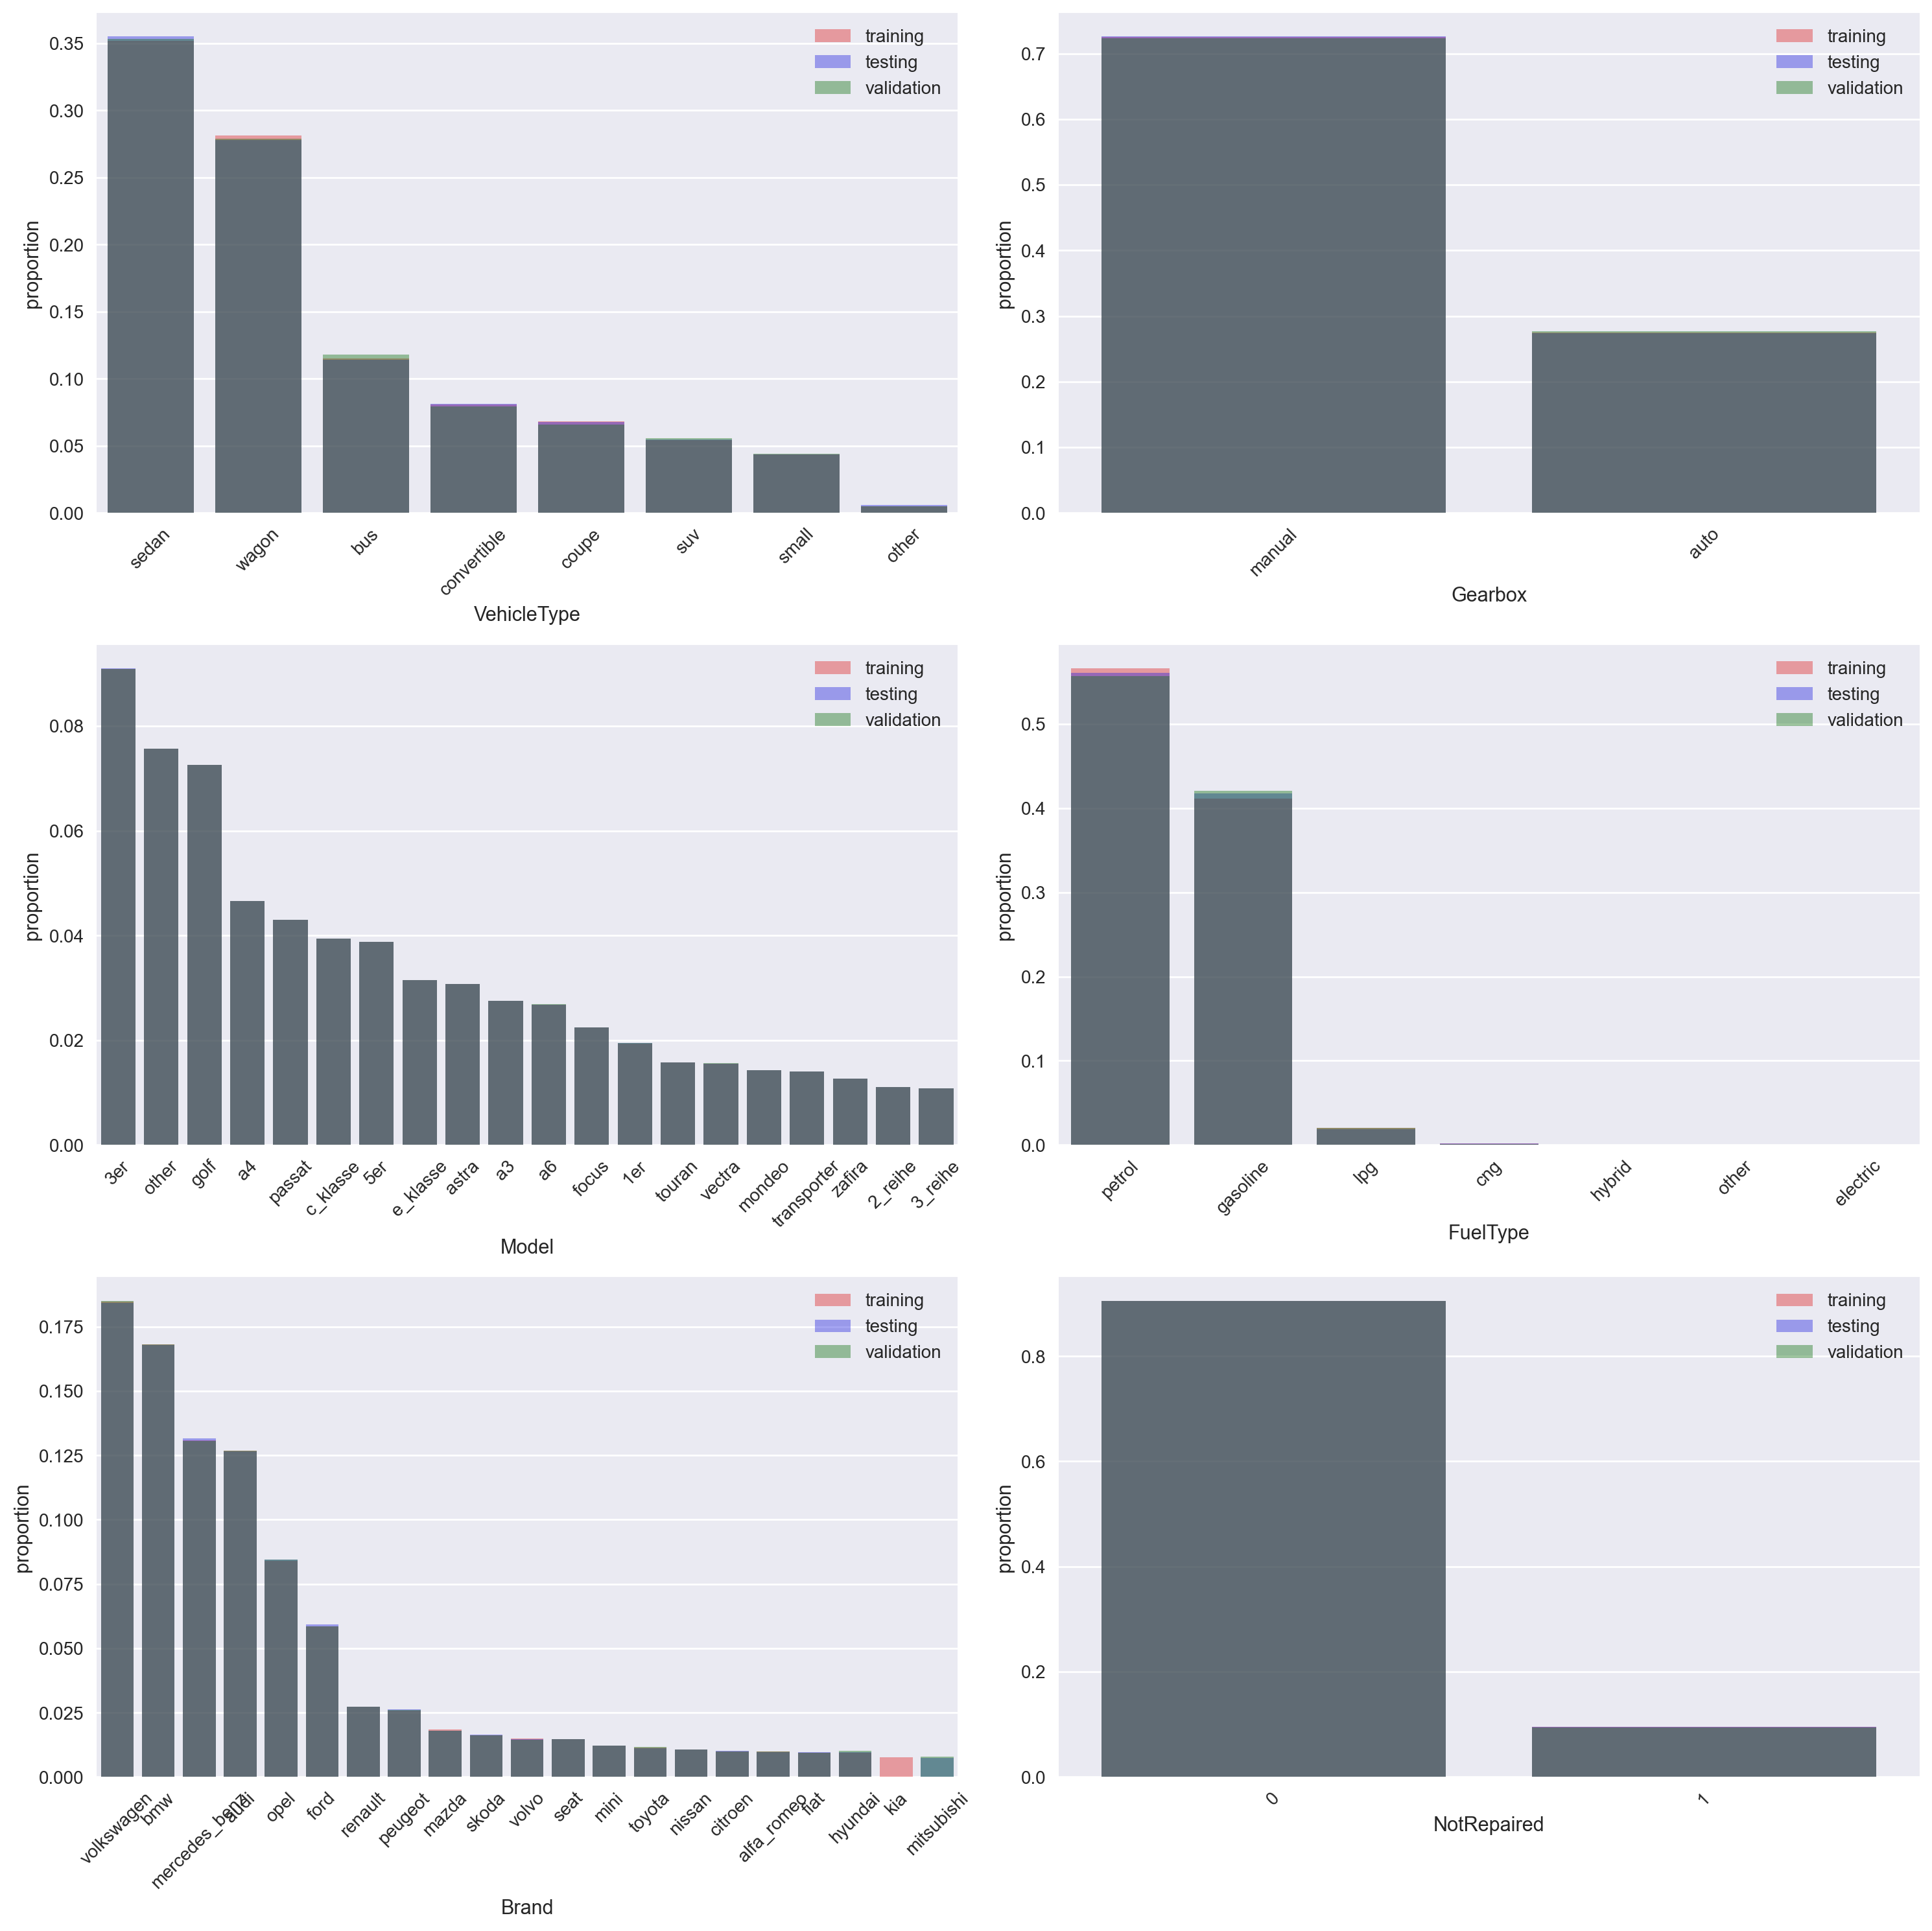

In [37]:
# visualisasi proporsi kelas untuk setiap fitur kategorik
plt.figure(figsize=(15,15))
for i,var in enumerate(cat_variable_):
    plt.subplot(3,2,i+1)
    sns.barplot(train[var].value_counts(True).head(20), alpha=0.4, color='red', label='training', ax=plt.gca())
    sns.barplot(val[var].value_counts(True).head(20), alpha=0.4, color='blue', label='testing', ax=plt.gca())
    sns.barplot(test[var].value_counts(True).head(20), alpha=0.4, color='green', label='validation', ax=plt.gca())
    plt.legend()
    plt.xticks(rotation=45)
plt.tight_layout()

Dari visualisasi di atas, terlihat bahwa proporsi masing-masing kelas pada setiap fitur kategorik antara *training dataset*, *testing dataset* dan *validation set* relatif proporsional.

Berikutnya, kita akan memisahkan antara fitur dan target.

In [38]:
# memisahkan fitur dan target
train_x, train_y = train.drop(columns=['Price']), train['Price']
val_x, val_y = val.drop(columns=['Price']), val['Price']
test_x, test_y = test.drop(columns=['Price']), test['Price']

print(f"train_x.shape : {train_x.shape} | train_y.shape : {train_y.shape}")
print(f"val_x.shape   : {val_x.shape} | val_y.shape   : {val_y.shape}")
print(f"test_x.shape  : {test_x.shape} | test_y.shape  : {test_y.shape}")

train_x.shape : (92144, 10) | train_y.shape : (92144,)
val_x.shape   : (30704, 10) | val_y.shape   : (30704,)
test_x.shape  : (30705, 10) | test_y.shape  : (30705,)


### **Features Scaling & One Hot Encoding**

Terdapat variabel numerik dan kategorik di dalam dataset. Kita perlu melakukan proses *scaling* untuk data numerik dan *one-hot-encoding* (OHE) untuk data kategorik. Nilai/kelompok di dalam variabel kategorik dengan frekuensi kurang dari `min_frequency` akan dikelompokkan sebagai *infrequent category*. Nilai yang tepat perlu ditentukan untuk variabel `min_frequency`, sehingga `min_frequency` akan dijadikan sebagai *hyperparameter* yang akan dioptimasi pada proses selanjutnya.

In [39]:
# membuat transformers
def features_transformer(train_x, val_x, test_x, min_freq):
    features_transformer = make_column_transformer(
        (StandardScaler(), make_column_selector(dtype_include=np.number)),
        (OneHotEncoder(drop='first', sparse_output=False, min_frequency=min_freq), make_column_selector(dtype_include=object)),
        n_jobs=-1)

    # transformasi data
    features_train = features_transformer.fit_transform(train_x)
    features_val = features_transformer.transform(val_x)
    features_test = features_transformer.transform(test_x)

    return features_train, features_val, features_test

## 2) Optimasi Model

Pada sesi ***Model Optimization***, kita akan melakukan optimasi model dengan cara mencari konfigurasi nilai *hyperparameter* terbaik. Pencarian nilai tersebut akan dilakukan menggunakan *library* **Optuna**. Fungsi objektif yang kita gunakan ketika mencari *hyperparameter* terbaik, yaitu meminimalisir skor *mean absolute error* (MAE) ketika model memprediksi *validation set*.

Selain berfokus pada pencarian model yang dapat menghasilkan skor MAE seminimal mungkin, pada sesi ini kita juga akan mempelajari seberapa lama waktu yang dibutuhkan untuk melatih model. Adapun model yang akan digunakan antara lain, **Linear Regression**, **Random Forest Regressor**, dan **XGBoost Regressor**.

In [40]:
# function untuk evaluasi model
def processing_time(func, params:tuple, iterations=10):
    process_time = []
    for i in range(iterations):
        start_time = time.process_time()
        func(*params)
        end_time = time.process_time()
        process_time.append(end_time-start_time)
    return {'mean':np.mean(process_time), 'std':np.std(process_time)} # output: second

def actual_vs_pred_graph(y_true, y_pred, mae, label, alpha, ax):
    ax.scatter(y_true, y_pred, label=f'actual vs. prediction ({label})', alpha=alpha)

    # garis mae = 0
    ax.plot(np.arange(0, 21_000, 1000), np.arange(0, 21_000, 1000), linestyle='dashdot', color='red', label='mae = 0')

    # Area <= mae
    ax.fill_between(np.arange(0, 21_000, 1000), np.arange(0, 21_000, 1000)+mae, np.arange(0, 21_000, 1000)-mae, 
                    color='pink', alpha=0.5, label=f'area for MAE \u2264 {mae:.1f}')

    ax.legend(loc="upper left")

def model_eval(model, train_set:tuple, val_set:tuple, graph=True):
    # melatih model dan menghitung durasi pelatihan
    training_cpu_time = processing_time(model.fit, train_set)

    # menghitung waktu untuk prediksi validation set
    predict_cpu_time = processing_time(model.predict, (val_set[0],))

    # menghitung mae
    pred_train = model.predict(train_set[0])
    pred_val  = model.predict(val_set[0])
    train_mae = mean_absolute_error(train_set[1], pred_train)
    val_mae = mean_absolute_error(val_set[1], pred_val)

    print(f"training_cpu_time  : {training_cpu_time} in seconds")
    print(f"predict_cpu_time   : {predict_cpu_time} in seconds")
    print(f"train_mae          : {train_mae:.2f} Euro")
    print(f"test_mae           : {val_mae:.2f} Euro")

    # visualisasi data aktual vs prediksi
    if graph:
        fig, ax = plt.subplots(ncols=2, figsize=(15,5))
        # training set
        actual_vs_pred_graph(train_set[1], pred_train, train_mae, 'Training', 0.1, ax[0])
        ax[0].set_xlim((0, train_set[1].max()))
        ax[0].set_ylim((0, pred_train.max()))
        ax[0].set_xlabel("Actual price (Euro)", size=12)
        ax[0].set_ylabel("Predicted price (Euro)", size=12)
        # validation set
        actual_vs_pred_graph(val_set[1], pred_val, val_mae, 'Validation', 0.1, ax[1])
        ax[1].set_xlim((0, val_set[1].max()))
        ax[1].set_ylim((0, pred_val.max()))
        ax[1].set_xlabel("Actual price (Euro)", size=12)
        ax[1].set_ylabel("Predicted price (Euro)", size=12)

        plt.suptitle("Comparison of Predicted and Actual Used Car Price", size=15)
        plt.tight_layout()

### **Linear Regression**

Model **Linear Regresion** akan menjadi tolak ukur dasar kualitas suatu model. Diharapkan algoritma model lainnya dapat melewati performa model ini. *Hyperparameter* yang di-*tuning* untuk model ini, yaitu `min_frequency` dengan rentang nilai uji antara 0 hingga 1. Proses optimasi yang membutuhkan waktu panjang mengakibatkan proses tersebut dilakukan pada script terpisah yang dapat dilihat pada file 
`/hyperparameter_tuning/linear_regression.py`. Hasil log optimasi dapat dilihat pada file `/hyperparameter_tuning/linear_regression.log`.

Berikut di bawah ini akan ditampilkan data log hasil optimasi model **Linear Regression**.

In [41]:
# data log optimasi model
with open('./hyperparameter_tuning/linear_regression.log', 'r') as f:
    log_lr = f.read()
print(log_lr)

Trial 0 finished with best value: 2276.3028364527636 and parameters: {'min_freq': 0.3732286479430995}. 
Trial 7 finished with best value: 2251.1075950067375 and parameters: {'min_freq': 0.2427222466054525}. 
Trial 10 finished with best value: 2080.3171442295275 and parameters: {'min_freq': 0.0523479014247093}. 
Trial 12 finished with best value: 2050.8855025731864 and parameters: {'min_freq': 0.022065712603542398}. 
Trial 18 finished with best value: 1930.2452258564333 and parameters: {'min_freq': 0.0026919043879694016}. 
Trial 23 finished with best value: 1898.4791850948227 and parameters: {'min_freq': 0.000963373313691617}. 
Trial 34 finished with best value: 1891.0576355379658 and parameters: {'min_freq': 0.000650209923083287}. 
Trial 93 finished with best value: 1880.9622689017422 and parameters: {'min_freq': 0.0003947708092972742}. 
Trial 106 finished with best value: 1877.0581131044205 and parameters: {'min_freq': 0.0002728742952997627}. 
Trial 114 finished with best value: 1871.

Berikut di bawah ini kita akan menggunakan *hyperparameter* terbaik berdasarkan log di atas untuk melatih dan melakukan evaluasi model **Linear Regression**. Evaluasi akan dilakukan menggunakan *training set* dan *validation set*.

training_cpu_time  : {'mean': 9.403125, 'std': 0.3652241392282279} in seconds
predict_cpu_time   : {'mean': 0.028125, 'std': 0.04831132760543846} in seconds
train_mae          : 1868.81 Euro
test_mae           : 1869.95 Euro
CPU times: total: 1min 35s
Wall time: 18.7 s


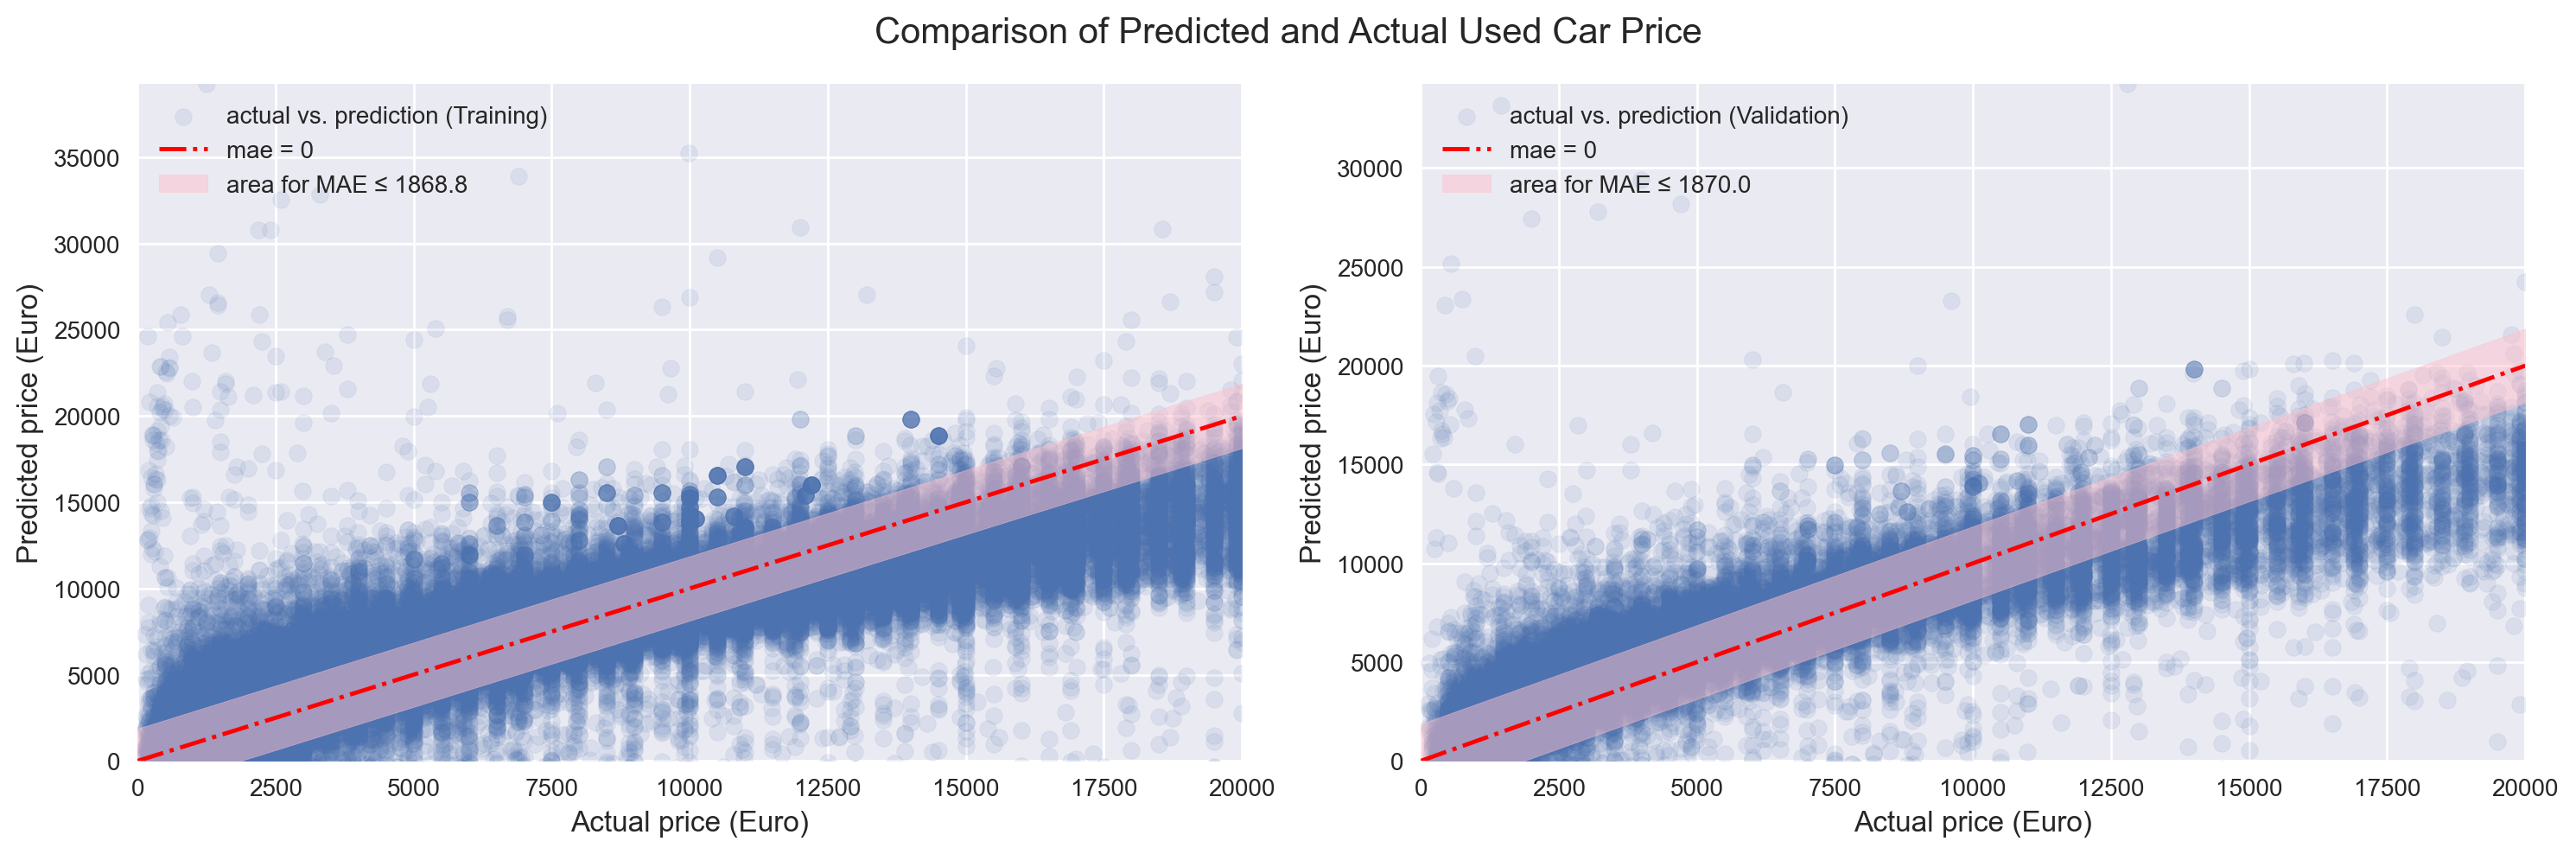

In [42]:
%%time
# best hyperparameter
best_lr = ast.literal_eval(re.findall('{[\S ]+}', log_lr)[-1])

# konfigurasi model dan hyperparameter
lr = LinearRegression()
lr_train_x, lr_val_x, lr_test_x = features_transformer(train_x, val_x, test_x, min_freq=best_lr['min_freq'])

# melatih model dan melakukan evaluasi model pada validation set
model_eval(lr, (lr_train_x, train_y), (lr_val_x, val_y))

<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jumlah waktu yang dibutuhkan untuk melatih model, yaitu sekitar 8 hingga 10 detik. Adapun jumlah waktu yang dibutuhkan untuk memprediksi *validation set*, yaitu sekitar 0 hingga 0.17 detik.
* Hasil evaluasi model menunjukkan model tergolong *well-fitted model*, dengan skor MAE ketika memprediksi *validation set* sebesar 1869.95 Euro.
* Dari grafik, terlihat sejumlah data dengan kesalahan prediksi ekstrim, dimana harga kurang dari 2500 Euro diprediksi dengan nilai antara 10,000 hingga 35,000 Euro.
* Garis MAE = 0 memiliki slope yang lebih tinggi dibandingkan garis harga prediksi. Posisi perpotongan berada pada sekitar harga aktual 7,500 hingga 10,000 Euro. Area tersebut merupakan area dengan tingkat error prediksi terendah.
* Jika melihat visualisasi prediksi *validation set*, terlihat titik data cukup banyak memasuki area MAE &le; 1870 untuk harga aktual kurang 12,500 Euro. Hal ini menunjukkan bahwa model kurang baik memprediksi mobil bekas yang memiliki harga aktual di atas 12,500 Euro.


</div>

### **Random Forest Regressor**

Model **Random Forest Regressor** merupakan *ensemble-model* pada kelompok *bagging* yang memiliki kemampuan cukup baik dalam memprediksi dan meminimalisir *overfitting*. Pada model ini terdapat sejumlah *hyperparameter* yang akan dioptimalkan, yaitu:
* **Kedalaman pohon maksimum (`max_depth`):** Nilai yang terlalu besar dapat menyebabkan *overfitting*. Kita akan menguji nilai `max_depth` pada rentang 1 hingga 50.
* **Jumlah sampel minimum untuk membagi sebuah *internal node* (`min_samples_split`):** Nilai yang terlalu kecil dapat mengakibatkan *overfitting*. Kita akan menguji nilai `min_samples_split` pada rentang 2 hingga 50.
* **Jumlah sampel minimum yang terdapat di dalam *leaf node* (`min_samples_leaf`):** Nilai yang terlalu kecil dapat mengakibatkan *overfitting*. Kita akan mengatur nilai `min_samples_leaf` pada rentang 1 hingga `min_samples_split - 1`.
* **Jumlah fitur maksimum yang digunakan (`max_features`):** Ukuran fitur data cukup besar akibat OHE, sehingga untuk mengurangi kompleksitas kita perlu mengatur nilai `max_features` pada rentang 0 hingga 1.
* Adapun untuk proses *feature engineering*, kita melakukan optimasi pada parameter `min_freq` dengan rentang nilai 0 hingga 1.

Proses optimasi yang membutuhkan waktu panjang mengakibatkan proses tersebut dilakukan pada script terpisah yang dapat dilihat pada file 
`/hyperparameter_tuning/random_forest.py`. Hasil log optimasi dapat dilihat pada file `/hyperparameter_tuning/random_forest.log`. 

Berikut di bawah ini akan ditampilkan data log hasil optimasi model **Random Forest Regressor**.

In [43]:
# data log optimasi model
with open('./hyperparameter_tuning/random_forest.log', 'r') as f:
    log_rf = f.read()
print(log_rf)

Trial 0 finished with best value: 1634.5025226153202 and parameters: {'max_depth': 19, 'min_samples_split': 50, 'min_samples_leaf': 37, 'max_features': 0.4488157937416981, 'min_freq': 0.6870220521880435}. 
Trial 1 finished with best value: 1579.7781495293214 and parameters: {'max_depth': 27, 'min_samples_split': 33, 'min_samples_leaf': 8, 'max_features': 0.8829783115153603, 'min_freq': 0.6282084108463609}. 
Trial 2 finished with best value: 1530.9628289099787 and parameters: {'max_depth': 42, 'min_samples_split': 18, 'min_samples_leaf': 9, 'max_features': 0.5019060563551687, 'min_freq': 0.5122192660006679}. 
Trial 4 finished with best value: 1530.0220790222509 and parameters: {'max_depth': 29, 'min_samples_split': 24, 'min_samples_leaf': 12, 'max_features': 0.611165500548649, 'min_freq': 0.49116401374843455}. 
Trial 10 finished with best value: 1484.1153877800105 and parameters: {'max_depth': 31, 'min_samples_split': 24, 'min_samples_leaf': 15, 'max_features': 0.9514307012002636, 'min_

Berikut di bawah ini kita akan menggunakan *hyperparameter* terbaik berdasarkan log di atas untuk melatih dan melakukan evaluasi model **Random Forest Regressor**. Evaluasi akan dilakukan menggunakan *training set* dan *validation set*.

training_cpu_time  : {'mean': 187.025, 'std': 1.204163512827473} in seconds
predict_cpu_time   : {'mean': 1.7734375, 'std': 0.07944202386803852} in seconds
train_mae          : 714.84 Euro
test_mae           : 1140.64 Euro
CPU times: total: 31min 36s
Wall time: 2min 55s


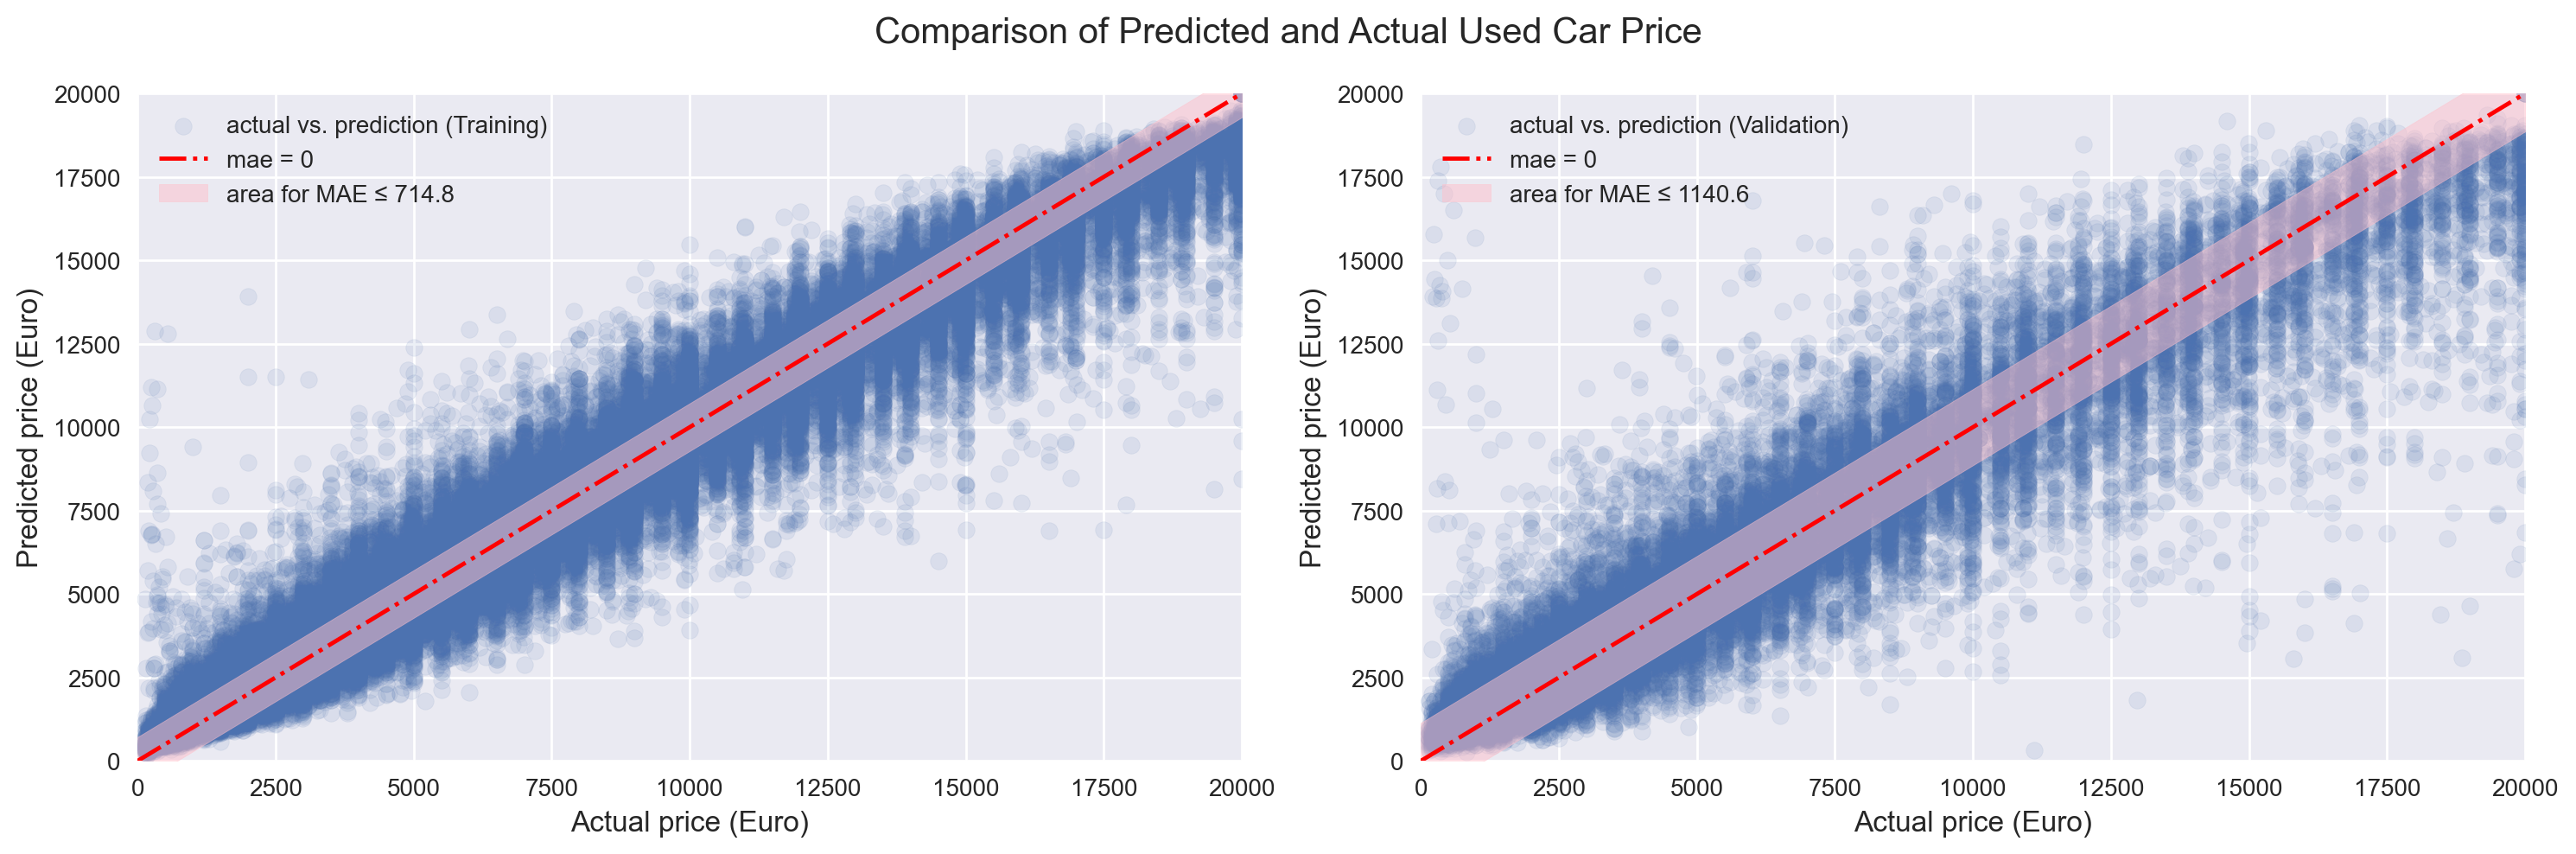

In [44]:
%%time
# best hyperparameter
best_rf = ast.literal_eval(re.findall('{[\S ]+}', log_rf)[-1])

# konfigurasi model dan hyperparameter
rf = RandomForestRegressor(n_estimators=100, max_depth=best_rf['max_depth'], min_samples_split=best_rf['min_samples_split'],
                           min_samples_leaf=best_rf['min_samples_leaf'], max_features=best_rf['max_features'],
                           bootstrap=False, n_jobs=-1, random_state=101010)
rf_train_x, rf_val_x, rf_test_x = features_transformer(train_x, val_x, test_x, min_freq=best_rf['min_freq'])

# melatih model dan melakukan evaluasi model pada validation set
model_eval(rf, (rf_train_x, train_y), (rf_val_x, val_y))

<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jumlah waktu yang dibutuhkan untuk melatih model, yaitu sekitar 183 hingga 190 detik. Durasi pelatihan ini sangat jauh lebih besar dibandingkan durasi pelatihan model Linear Regression yang hanya membutuhkan waktu 5% dari waktu pelatihan model Random Forest.
* Jumlah waktu yang dibutuhkan untuk memprediksi *validation set*, yaitu sekitar 1.5 hingga 2 detik. Durasi prediksi ini sekitar 10 kali lipat durasi prediksi model Linear Regression..
* Hasil evaluasi menunjukkan model tergolong *overfitting*, dengan skor MAE ketika memprediksi *validation set* sebesar 1140.64 Euro, dimana skor MAE ketika memprediksi *training set* sebesar 714.84 Euro.
* Ditemukan sejumlah titik data dengan kesalahan prediksi ekstrim pada area harga aktual kurang dari 2,500 Euro, tetapi tidak sebanyak prediksi model Linear Regression.
* Garis MAE = 0 memiliki slope yang relatif sama dengan slope garis harga prediksi. Hal ini mengakibatkan jangkauan harga aktual yang diprediksi dengan akurat oleh model akan lebih besar. Berdasarkan hasil prediksi *validation set* dapat terlihat bahwa model cukup baik untuk memprediksi harga aktual berkisar 2,500 hingga 17,500 Euro. Hal ini ditandai dengan banyaknya data yang berada pada area MAE &le; 1140.6.


</div>

### **XGBoost Regressor**

Model **XGBoost Regressor** merupakan *ensemble-model* pada kelompok *boosting* yang memiliki kemampuan cukup baik dalam memprediksi. Pada model ini terdapat sejumlah *hyperparameter* yang akan dioptimalkan, yaitu:
* **Kedalaman pohon maksimum (`max_depth`):** Pohon yang terlalu dalam dapat mengakibatkan *overfitting*. Sebaliknya, pohon yang terlalu dangkal dapat menyebabkan *underfitting*. Oleh karena itu kita akan menguji kedalaman pohon sebesar 1 hingga 100.
* **Jumlah *leaf node* maksimum (`max_leaves`):** Nilai yang terlalu besar dapat mengakibatkan *overfitting*. Kita akan menguji nilai `max_leaves` pada rentang 1 hingga 2000.
* **Konstanta laju pembelajaran (`learning_rate`):** Konstanta yang berfungsi untuk memperoleh *global optimum* dan menghindari *local optimum*. Kita akan menguji nilai `learning_rate` pada rentang 0,0001 hingga 0,5.
* **Konstanta regularisasi L1 (`reg_alpha`):** Konstanta yang berfungsi untuk mengurangi *overfitting*. Kita akan menguji nilai `reg_alpha` pada rentang 0 hingga 100.
* **Konstanta regularisasi L2 (`reg_lambda`):** Konstanta yang berfungsi untuk mengurangi *overfitting*. Kita akan menguji nilai `reg_lambda` pada rentang 0 hingga 100.
* **Rasio kolom yang digunakan untuk membangun pohon (`colsample_bytree`):** Ukuran fitur data cukup besar akibat OHE, sehingga untuk mengurangi kompleksitas kita perlu mengatur nilai `colsample_bytree` pada rentang 0 hingga 1.
* Adapun untuk proses *feature engineering*, kita melakukan optimasi pada parameter `min_freq` dengan rentang nilai 0 hingga 1.

Proses optimasi yang membutuhkan waktu panjang mengakibatkan proses tersebut dilakukan pada script terpisah yang dapat dilihat pada file 
`/hyperparameter_tuning/gradient_boosting.py`. Hasil log optimasi dapat dilihat pada file `/hyperparameter_tuning/gradient_boosting.log`. 

Berikut di bawah ini akan ditampilkan data log hasil optimasi model **XGBoost Regressor**.

In [45]:
# data log optimasi model
with open('./hyperparameter_tuning/gradient_boosting.log', 'r') as f:
    log_xgb = f.read()
print(log_xgb)

Trial 0 finished with best value: 1585.5390838650503 and parameters: {'max_depth': 38, 'max_leaves': 1972, 'learning_rate': 0.3688157075246303, 'reg_alpha': 44.88157937416981, 'reg_lambda': 68.70220521880435, 'colsample_bytree': 0.528669923728543, 'min_freq': 0.6519981802378485}. 
Trial 1 finished with best value: 1561.275285334094 and parameters: {'max_depth': 25, 'max_leaves': 1766, 'learning_rate': 0.31414138458209584, 'reg_alpha': 83.58889380531987, 'reg_lambda': 34.2664468945313, 'colsample_bytree': 0.49437828215077206, 'min_freq': 0.5019060563551687}. 
Trial 4 finished with best value: 1510.4943836588857 and parameters: {'max_depth': 62, 'max_leaves': 934, 'learning_rate': 0.07724609898635398, 'reg_alpha': 3.6656897995070437, 'reg_lambda': 11.314198876260207, 'colsample_bytree': 0.7627643635472817, 'min_freq': 0.41219839625468113}. 
Trial 6 finished with best value: 1482.1121237359362 and parameters: {'max_depth': 12, 'max_leaves': 81, 'learning_rate': 0.47097399267061324, 'reg_a

Berikut di bawah ini kita akan menggunakan *hyperparameter* terbaik berdasarkan log di atas untuk melatih dan melakukan evaluasi model **XGBoost Regressor**. Evaluasi akan dilakukan menggunakan *training set* dan *validation set*.

training_cpu_time  : {'mean': 126.0109375, 'std': 1.1485820487262761} in seconds
predict_cpu_time   : {'mean': 0.7359375, 'std': 0.09229337141013974} in seconds
train_mae          : 848.14 Euro
test_mae           : 1119.70 Euro
CPU times: total: 21min 12s
Wall time: 1min 55s


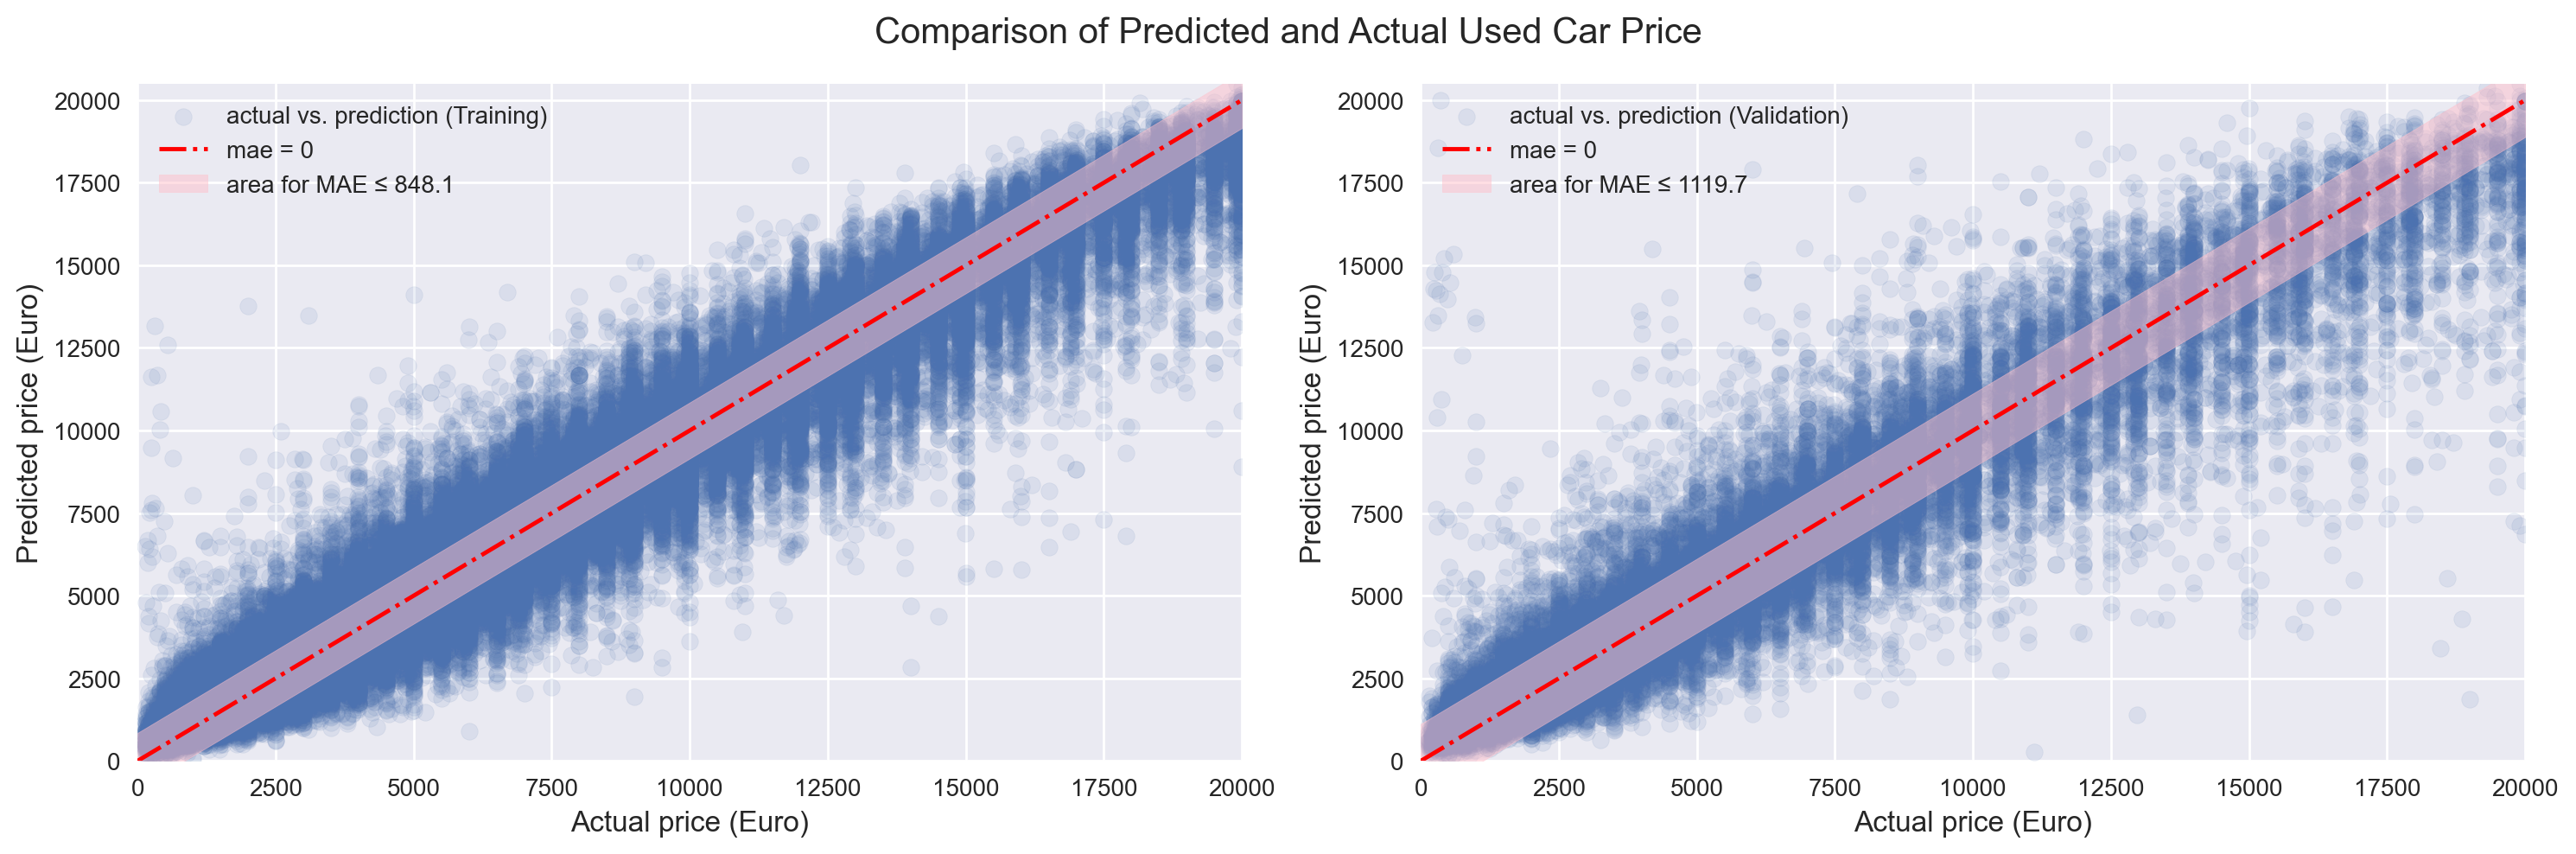

In [46]:
%%time
# best hyperparameter
best_xgb = ast.literal_eval(re.findall('{[\S ]+}', log_xgb)[-1])

# konfigurasi model dan hyperparameter
xgb = XGBRegressor(n_estimators=100, max_depth=best_xgb['max_depth'], max_leaves=best_xgb['max_leaves'],
                   learning_rate=best_xgb['learning_rate'], reg_alpha=best_xgb['reg_alpha'], reg_lambda=best_xgb['reg_lambda'], 
                   colsample_bytree = best_xgb['colsample_bytree'], grow_policy='lossguide', 
                   n_jobs=-1, random_state=101010)
xgb_train_x, xgb_val_x, xgb_test_x = features_transformer(train_x, val_x, test_x, min_freq=best_xgb['min_freq'])

# melatih model dan melakukan evaluasi model pada validation set
model_eval(xgb, (xgb_train_x, train_y), (xgb_val_x, val_y))

<h4 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h4>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Jumlah waktu yang dibutuhkan untuk melatih model, yaitu sekitar 122 hingga 129 detik. Durasi pelatihan ini lebih kecil dari durasi pelatihan model Random Forest (&pm;&Delta;60 detik) dan lebih besar dari durasi pelatihan model Linear Regression (&pm;&Delta;120 detik).
* Jumlah waktu yang dibutuhkan untuk memprediksi *validation set*, yaitu sekitar 0.4 hingga 1 detik. Durasi prediksi ini lebih kecil dari pada durasi prediksi model Random Forest (&pm;&Delta;1 detik) dan lebih besar dibandingkan prediksi model Linear Regression (&pm;&Delta;0.8 detik).
* Hasil evaluasi menunjukkan model tergolong *overfitting*, dengan skor MAE ketika memprediksi *validation set* sebesar 1119.70 Euro, dimana skor MAE ketika memprediksi *training set* sebesar 848.14 Euro. Tingkat *overfitting* model ini tidak sebesar model Random Forest.
* Ditemukan sejumlah titik data dengan kesalahan prediksi ekstrim pada area harga aktual kurang dari 2,500 Euro, tetapi tidak sebanyak prediksi model Linear Regression.
* Berdasarkan visualisasi prediksi *validation set*, model akan cukup baik untuk memprediksi mobil dengan harga aktual berkisar 2,500 hingga 17,500 Euro. Hal itu ditandai dengan banyaknya titik data yang masuk di dalam area MAE &le;1119.7.

</div>

## 3) Evaluasi Model

Berikut di bawah ini, kita akan menampilkan skor MAE masing-masing model ketika memprediksi *testing set*.

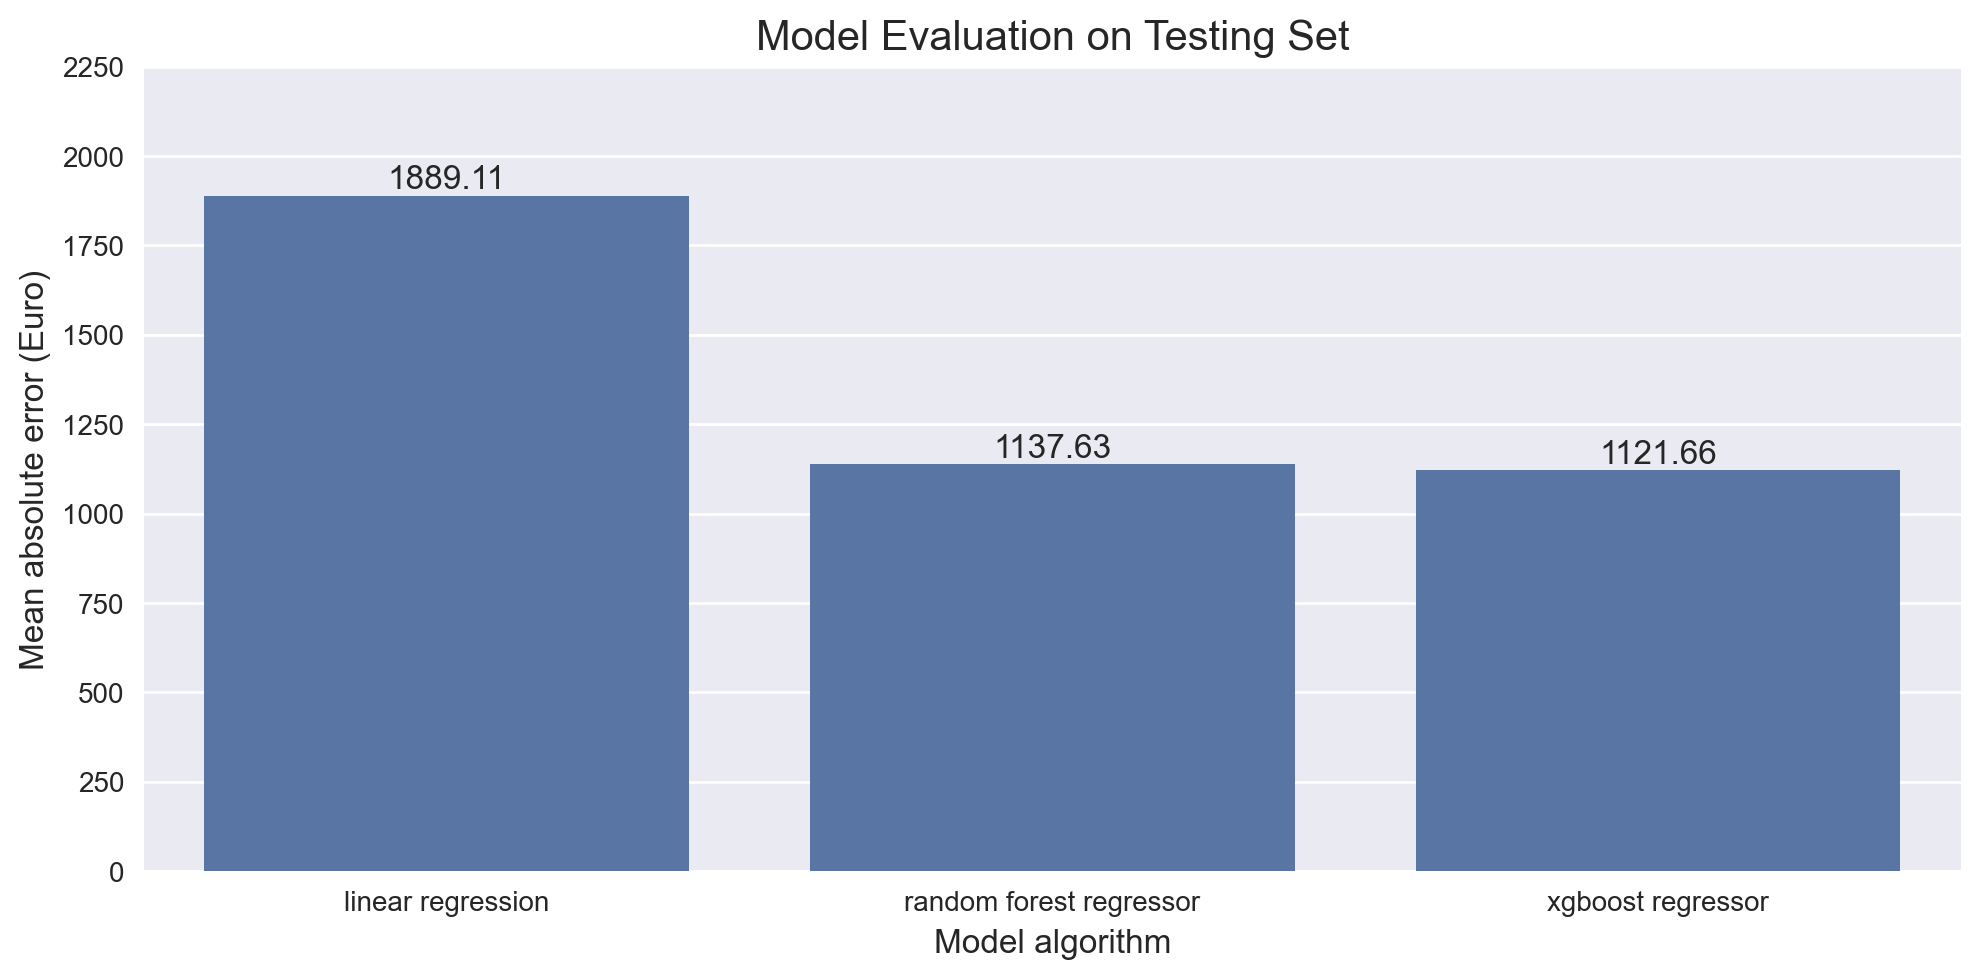

In [47]:
# menghitung skor MAE
mae_score = pd.Series({'lr':np.nan, 'rf':np.nan, 'xgb':np.nan})
mae_score['lr'] = mean_absolute_error(test_y, lr.predict(lr_test_x))
mae_score['rf'] = mean_absolute_error(test_y, rf.predict(rf_test_x))
mae_score['xgb'] = mean_absolute_error(test_y, xgb.predict(xgb_test_x))

# visualisasi
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(mae_score, ax=ax)
ax.bar_label(ax.containers[0], size=12)
plt.title("Model Evaluation on Testing Set", size=15)
ax.set_xlabel("Model algorithm", size=12)
ax.set_ylabel("Mean absolute error (Euro)", size=12)
ax.set_ylim(0, 2250)

# mengatur xtick-labels
ax.xaxis.set_major_locator(FixedLocator([0, 1, 2]))
ax.set_xticklabels(['linear regression','random forest regressor', 'xgboost regressor'])

plt.tight_layout()
fig.savefig("../assets/Model Evaluation on Testing Set")

<h3 style="font-weight:bold; font-family:Trebuchet MS">Findings & Insights</h3>
<div style="margin-left:1%; margin-top:1%; width:97%; text-align:justify">

* Dari hasil di atas, model Linear Regression memiliki tingkat eror sangat besar dibandingkan dua model lainnya. Model Random Forest dapat dikatakan memiliki kualitas yang serupa dengan model XGBoost, tetapi model XGBoost memiliki tingkat eror sedikit lebih rendah.
* Pada seluruh model, skor MAE ketika memprediksi *testing set* relatif mendekati skor MAE ketika memprediksi *validation set*. Hal ini menunjukkan bahwa model cukup stabil dalam memprediksi *unseen data*.
* Dengan mempertimabangkan skor MAE yang rendah, durasi pelatihan yang minimal serta waktu prediksi yang singkat, dapat kita simpulkan bahwa model terbaik adalah model **XGBoost Regressor**.

</div>

Berikut di bawah ini, kita akan membuat pipeline model dan menyimpan model tersebut untuk kebutuhan *deployment*. Kita juga akan menyimpan konfigurasi input data kategorik yang dapat menjadi opsi masukan model.

In [48]:
# membuat pipeline model
features_transformer = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OneHotEncoder(drop='first', sparse_output=False, min_frequency=best_xgb['min_freq']), make_column_selector(dtype_include=object)),
    n_jobs=-1)
features_transformer.fit(train_x)

model_pipeline = Pipeline([('feature_eng', features_transformer),
                           ('predictive_model', xgb)])

# menyimpan pipeline
joblib.dump(model_pipeline, "../assets/used_car_price_predictor_pipeline.pkl")

['../assets/used_car_price_predictor_pipeline.pkl']

In [49]:
# menyimpan konfigurasi input data kategorik model
categorical_input = {'VehicleType': train_x['VehicleType'].unique().tolist(),
                     'Gearbox': train_x['Gearbox'].unique().tolist(),
                     'Model': train_x['Model'].unique().tolist(),
                     'FuelType': train_x['FuelType'].unique().tolist(),
                     'Brand': train_x['Brand'].unique().tolist()
                     }
with open("../assets/categorical_input.json", 'w') as f:
    json.dump(categorical_input, f, indent=4)

## 4) Kesimpulan

Proses optimasi dan evaluasi model telah selesai, berikut kesimpulan yang diperoleh:
1. Urutan model dengan durasi pelatihan tersingkat, yaitu Linear Regression (8-10 detik), XGBoost Regressor (122-129 detik) dan Random Forest Regressor (183-190 detik).
2. Urutan model dengan durasi prediksi tersingkat, yaitu Linear Regression, XGBoost Regressor dan Random Forest Regressor.
3. Skor MAE model ketika memprediksi *testing set*:
    * Linear Regression : 1889.11 Euro
    * Random Forest Regressor : 1137.63 Euro
    * XGBoost Regressor : 1124.66 Euro
4. Berdasarkan skor MAE, waktu pelatihan dan prediksi, model terbaik untuk memprediksi harga mobil bekas yaitu model **XGBoost Regressor**.

# **G. Kesimpulan**

<h3 style="font-weight:bold; font-family:Trebuchet MS">Hasil Analisa Data</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

* Harga tipikal mobil bekas yang dijual pada platform, yaitu sekitar 5000 Euro. Adapun kapasitas mesin yang dijual berkisar pada angka 140 hp. Mayoritas kilo meter jarak tempuh mobil bekas yang dijual pada platform ini adalah 125000 - 150000 kM. Tipikal usia kendaraan bekas yang dijual berusia 12 tahun. Masa aktif unggahan memiliki tipikal durasi selama 7 hari pasca melakukan unggahan.
* **Top 5** merek mobil bekas dengan harga tertinggi, yaitu **Porsche**, **Mini**, **Land Rover**, **Dacia**, dan **Smart**.
* **Top 3** tipe mobil bekas dengan harga tertinggi, yaitu **SUV**, **Convertible**, dan **Coupe**.
* **Top 3** jenis mobil bekas berdasarkan bahan bakar dengan harga tertinggi, yaitu **Hybrid**, **Gasoline** dan **Electric**.
* Mobil dengan jenis transmisi **automatic** memiliki harga yang lebih tinggi dibandingkan transmisi **manual**.
* Variabel `'Power'`, `'Mileage'`, dan `'car_age'` menunjukkan korelasi yang kuat terhadap variabel `'Price'` dibandingkan variabel lainnya. Usia mobil yang lebih tua dan jarak tempuh yang lebih tinggi, akan mengakibatkan harga jual mobil tersebut bernilai lebih rendah. Adapun kapasitas tenaga mesin yang besar akan mengakibatkan harga jual mobil semakin tinggi.

</div>

<h3 style="font-weight:bold; font-family:Trebuchet MS">Hasil Membangun Model</h3>
<div style="margin-left:2%; width:95%; text-align:justify">

* Urutan model dengan durasi pelatihan tersingkat, yaitu Linear Regression (8-10 detik), XGBoost Regressor (122-129 detik) dan Random Forest Regressor (183-190 detik).
* Urutan model dengan durasi prediksi tersingkat, yaitu Linear Regression, XGBoost Regressor dan Random Forest Regressor.
* Skor MAE model ketika memprediksi *testing set*:
    * Linear Regression : 1889.11 Euro
    * Random Forest Regressor : 1137.63 Euro
    * XGBoost Regressor : 1124.66 Euro
* Berdasarkan skor MAE, waktu pelatihan dan prediksi, model terbaik untuk memprediksi harga mobil bekas yaitu model **XGBoost Regressor**.

</div>